#### Description:
1.Load scReference_V7 which remove Adult_immuno_cell from Adult colon cell types then do high CV finding.

2.Calculate the correlation of the COAD with scReference

2.Normalize the correlation by each features (rows/cell type) into Range1

3.Normalize inside each group of screference cluster (Adult and Fetal), into Range 1 # This is kind of weight of each cell type cluster

4.Do the cluster

#### 1.Data Loading

In [7]:
# CutTree1.Loading_data.R
#### 1.Load dataset
###### read TCGA_COAD data ####
COAD_UCSC_Toil_tpm_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/UCSC_Toil/COAD_UCSC_Toil_tpm_dataset_merge.syn2623706.rds")
COAD_RSEM_gene_tpm <- COAD_UCSC_Toil_tpm_dataset$COAD.RSEM.gene.tpm
gencode.v23.annotation <- COAD_UCSC_Toil_tpm_dataset$gencode.v23.annotation
COAD.pheno <- COAD_UCSC_Toil_tpm_dataset$COAD.pheno.merge.syn2623706
#head(gencode.v23.annotation)
## convert ensembleID to symbol 
geneMatch <- match(rownames(COAD_RSEM_gene_tpm),gencode.v23.annotation$V1)
geneSymbol <- as.character(gencode.v23.annotation[geneMatch,]$V2)
COAD_tpm_symbol <- COAD_RSEM_gene_tpm
rownames(COAD_tpm_symbol) <- geneSymbol
#head(COAD_tpm_symbol)
## Read log10(x+1) transformed scReference 

#### Load scReference V5 
scReference.log10.CV <- readRDS("/data8t_4/JH/MyJobs/Normal_cell_reference/Step2_Merge_and_Filter_the_scReference/2020_2_1_scReferenceV7.log10.CV.rds")
scReference.list.log10.CV8000 <- scReference.log10.CV$scReference.list.log10.CV8000
scReference.list.log10.CV4500 <- scReference.log10.CV$scReference.list.log10.CV4500
scReference.list.log10.CV4000 <- scReference.log10.CV$scReference.list.log10.CV4000
scReference.list.log10.CV3500 <- scReference.log10.CV$scReference.list.log10.CV3500
scReference.list.log10.CV3000 <- scReference.log10.CV$scReference.list.log10.CV3000
scReference.list.log10.CV2500 <- scReference.log10.CV$scReference.list.log10.CV2500
scReference.list.log10.CV2000 <- scReference.log10.CV$scReference.list.log10.CV2000
#### 2.Distance calculation
### Distance calculation
##### Distance calculation 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/refCorMerge.R")
### 
##### Transform COAD data
#summary(colSums(COAD_tpm_symbol)) ### So its not log2 transformed
# Expression data transformation Log(x+1)
Log10.expList <- list(COAD_tpm_symbol = log10(COAD_tpm_symbol+1))
Cor.Res.CV8000 <- refCorMerge(Log10.expList, scReference.list.log10.CV8000)
Cor.Res.CV4500 <- refCorMerge(Log10.expList, scReference.list.log10.CV4500)
Cor.Res.CV4000 <- refCorMerge(Log10.expList, scReference.list.log10.CV4000)
Cor.Res.CV3500 <- refCorMerge(Log10.expList, scReference.list.log10.CV3500)
Cor.Res.CV3000 <- refCorMerge(Log10.expList, scReference.list.log10.CV3000)
Cor.Res.CV2500 <- refCorMerge(Log10.expList, scReference.list.log10.CV2500)
Cor.Res.CV2000 <- refCorMerge(Log10.expList, scReference.list.log10.CV2000)
### Find tumor samples
### only tumor samples
#TumorID <- rownames(COAD.pheno[COAD.pheno$sampleTypes == "Tumor",])
COAD.pheno.tumor <- COAD.pheno[,c("sampleTypes","msi","cimp")] ### For all samples

[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"


#### 2.The first Normalization
normal the correlation across each cell type

In [3]:
#### 3.Normalization Tumor samples
### normalize across the features
Trans.Rang1.cv8000<- base::apply(Cor.Res.CV8000$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv4500<- base::apply(Cor.Res.CV4500$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv4000<- base::apply(Cor.Res.CV4000$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv3500<- base::apply(Cor.Res.CV3500$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv3000<- base::apply(Cor.Res.CV3000$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv2500<- base::apply(Cor.Res.CV2500$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv2000<- base::apply(Cor.Res.CV2000$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv8000 <- t(Trans.Rang1.cv8000)
Trans.Rang1.cv4500 <- t(Trans.Rang1.cv4500)
Trans.Rang1.cv4000 <- t(Trans.Rang1.cv4000)
Trans.Rang1.cv3500 <- t(Trans.Rang1.cv3500)
Trans.Rang1.cv3000 <- t(Trans.Rang1.cv3000)
Trans.Rang1.cv2500 <- t(Trans.Rang1.cv2500)
Trans.Rang1.cv2000 <- t(Trans.Rang1.cv2000)

#### 4.Cluster

##### 2500
#options(repr.plot.width=20, repr.plot.height=15)
#pheatmap::pheatmap(Trans.Rang1.cv2500,annotation_col = COAD.pheno.tumor,
#                   show_colnames = T,cluster_rows = F,scale = "none")

In [10]:
## Test if i'm right
#summary(Cor.Res.CV2500$Cor.merged[,TumorID])
#summary(t(Cor.Res.CV2500$Cor.merged[,TumorID]))
#summary(t(Trans.Rang1.cv2500))

#### 3.The second Normalization 
Normalize the correlation across each cell type cluster;
It's the weight of each cell type cluster

In [4]:
rownames(Trans.Rang1.cv2500)

[1] "Tang.Adult.colon.Adult_Goblet_1"                                              
 [2] "Tang.Adult.colon.Adult_Enter_2"                                               
 [3] "Tang.Adult.colon.Adult_Enter_3"                                               
 [4] "Tang.Adult.colon.Adult_Goblet_2"                                              
 [5] "Tang.Adult.colon.Adult_Enter_1"                                               
 [6] "Tang.Adult.colon.Adult_MKI67_High"                                            
 [7] "Tang.Adult.colon.Adult_Endocrine"                                             
 [8] "Tang.Adult.colon.Adult_Mesenchymal"                                           
 [9] "Tang.Adult.colon.Adult_OLFM4_High"                                            
[10] "Tang.Fetal.GI.Esophagus_1_Ciliated Epithelial"                                
[11] "Tang.Fetal.GI.Esophagus_2_KRT6B+ Secretory Progenitor"                        
[12] "Tang.Fetal.GI.Esophagus_3_FGFR1LowNME5- Epithelial"                           
[13] "Tang.Fetal.GI.Esophagus_4_FGFR1HighNME5- Epithelial"                          
[14] "Tang.Fetal.GI.Stomach_1_PROCRHigh Progenitor"                                 
[15] "Tang.Fetal.GI.Stomach_2_Progenitor at Neck"                                   
[16] "Tang.Fetal.GI.Stomach_3_HES1HighProgenitor"                                   
[17] "Tang.Fetal.GI.Stomach_4_Parietal Progenitor"                                  
[18] "Tang.Fetal.GI.Stomach_5_Pit Progenitor"                                       
[19] "Tang.Fetal.GI.Stomach_6_Pit Cell"                                             
[20] "Tang.Fetal.GI.SIntes_1_Tuft Progenitor"                                       
[21] "Tang.Fetal.GI.SIntes_2_PROCR+ Progenitor"                                     
[22] "Tang.Fetal.GI.SIntes_3_Enterocyte Progenitor -1"                              
[23] "Tang.Fetal.GI.SIntes_4_Enterocyte Progenitor -2"                              
[24] "Tang.Fetal.GI.SIntes_5_Enterocyte"                                            
[25] "Tang.Fetal.GI.SIntes_6_Goblet Cell"                                           
[26] "Tang.Fetal.GI.SIntes_7_Secretory Progenitor"                                  
[27] "Tang.Fetal.GI.SIntes_8_LGR5+ Stem Cells"                                      
[28] "Tang.Fetal.GI.SIntes_9_Enteroendocrine"                                       
[29] "Tang.Fetal.GI.LIntes_1_DCLK1+ Progenitor"                                     
[30] "Tang.Fetal.GI.LIntes_2_MKI67+ Progenitor"                                     
[31] "Tang.Fetal.GI.LIntes_3_PROM1High Progenitor"                                  
[32] "Tang.Fetal.GI.LIntes_4_PROM1Low Progenitor"                                   
[33] "Tang.Fetal.GI.LIntes_5_LGR5+ Stem Cells"                                      
[34] "Tang.Fetal.GI.LIntes_6_Secretory Progenitor"                                  
[35] "Tang.Fetal.GI.LIntes_7_Goblet Progenitor"                                     
[36] "Tang.Fetal.GI.LIntes_8_Goblet Cell"                                           
[37] "Tang.Fetal.GI.LIntes_9_Enteroendocrine"                                       
[38] "Tang.Fetal.GI.LIntes_10_Enterocyte Cell"                                      
[39] "Tang.Fetal.GI.LIntes_11_Paneth-Like Cell"                                     
[40] "Tang.Normal.embryo.Tang_embryo_D6_EPI"                                        
[41] "Tang.Normal.embryo.Tang_embryo_D6_PE"                                         
[42] "Tang.Normal.embryo.Tang_embryo_D6_TE"                                         
[43] "Tang.Normal.embryo.Tang_embryo_D8_EPI"                                        
[44] "Tang.Normal.embryo.Tang_embryo_D8_PE"                                         
[45] "Tang.Normal.embryo.Tang_embryo_D8_TE"                                         
[46] "Tang.Normal.embryo.Tang_embryo_D10_EPI"                                       
[47] "Tang.Normal.embryo.Tang_embryo_D10_PE"                                        
[48] "

In [4]:
# 1.Subset the Adult and fetal scReference
Trans.Rang1.cv2500_colon_InNormal <- Trans.Rang1.cv2500[c(1:39),]
Trans.Rang1.cv2500_colon_InNormal[1:9,]<- base::apply(Trans.Rang1.cv2500_colon_InNormal[1:9,], 2, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv2500_colon_InNormal[10:39,]<- base::apply(Trans.Rang1.cv2500_colon_InNormal[10:39,], 2, function(x){
  (x-min(x))/(max(x)-min(x))
})

In [16]:
#### test if I'm right 
#summary(t(Trans.Rang1.cv2500_colon_InNormal[1:9,]))
#summary(t(Trans.Rang1.cv2500_colon_InNormal[10:39,]))

#### 4.Clust and plot

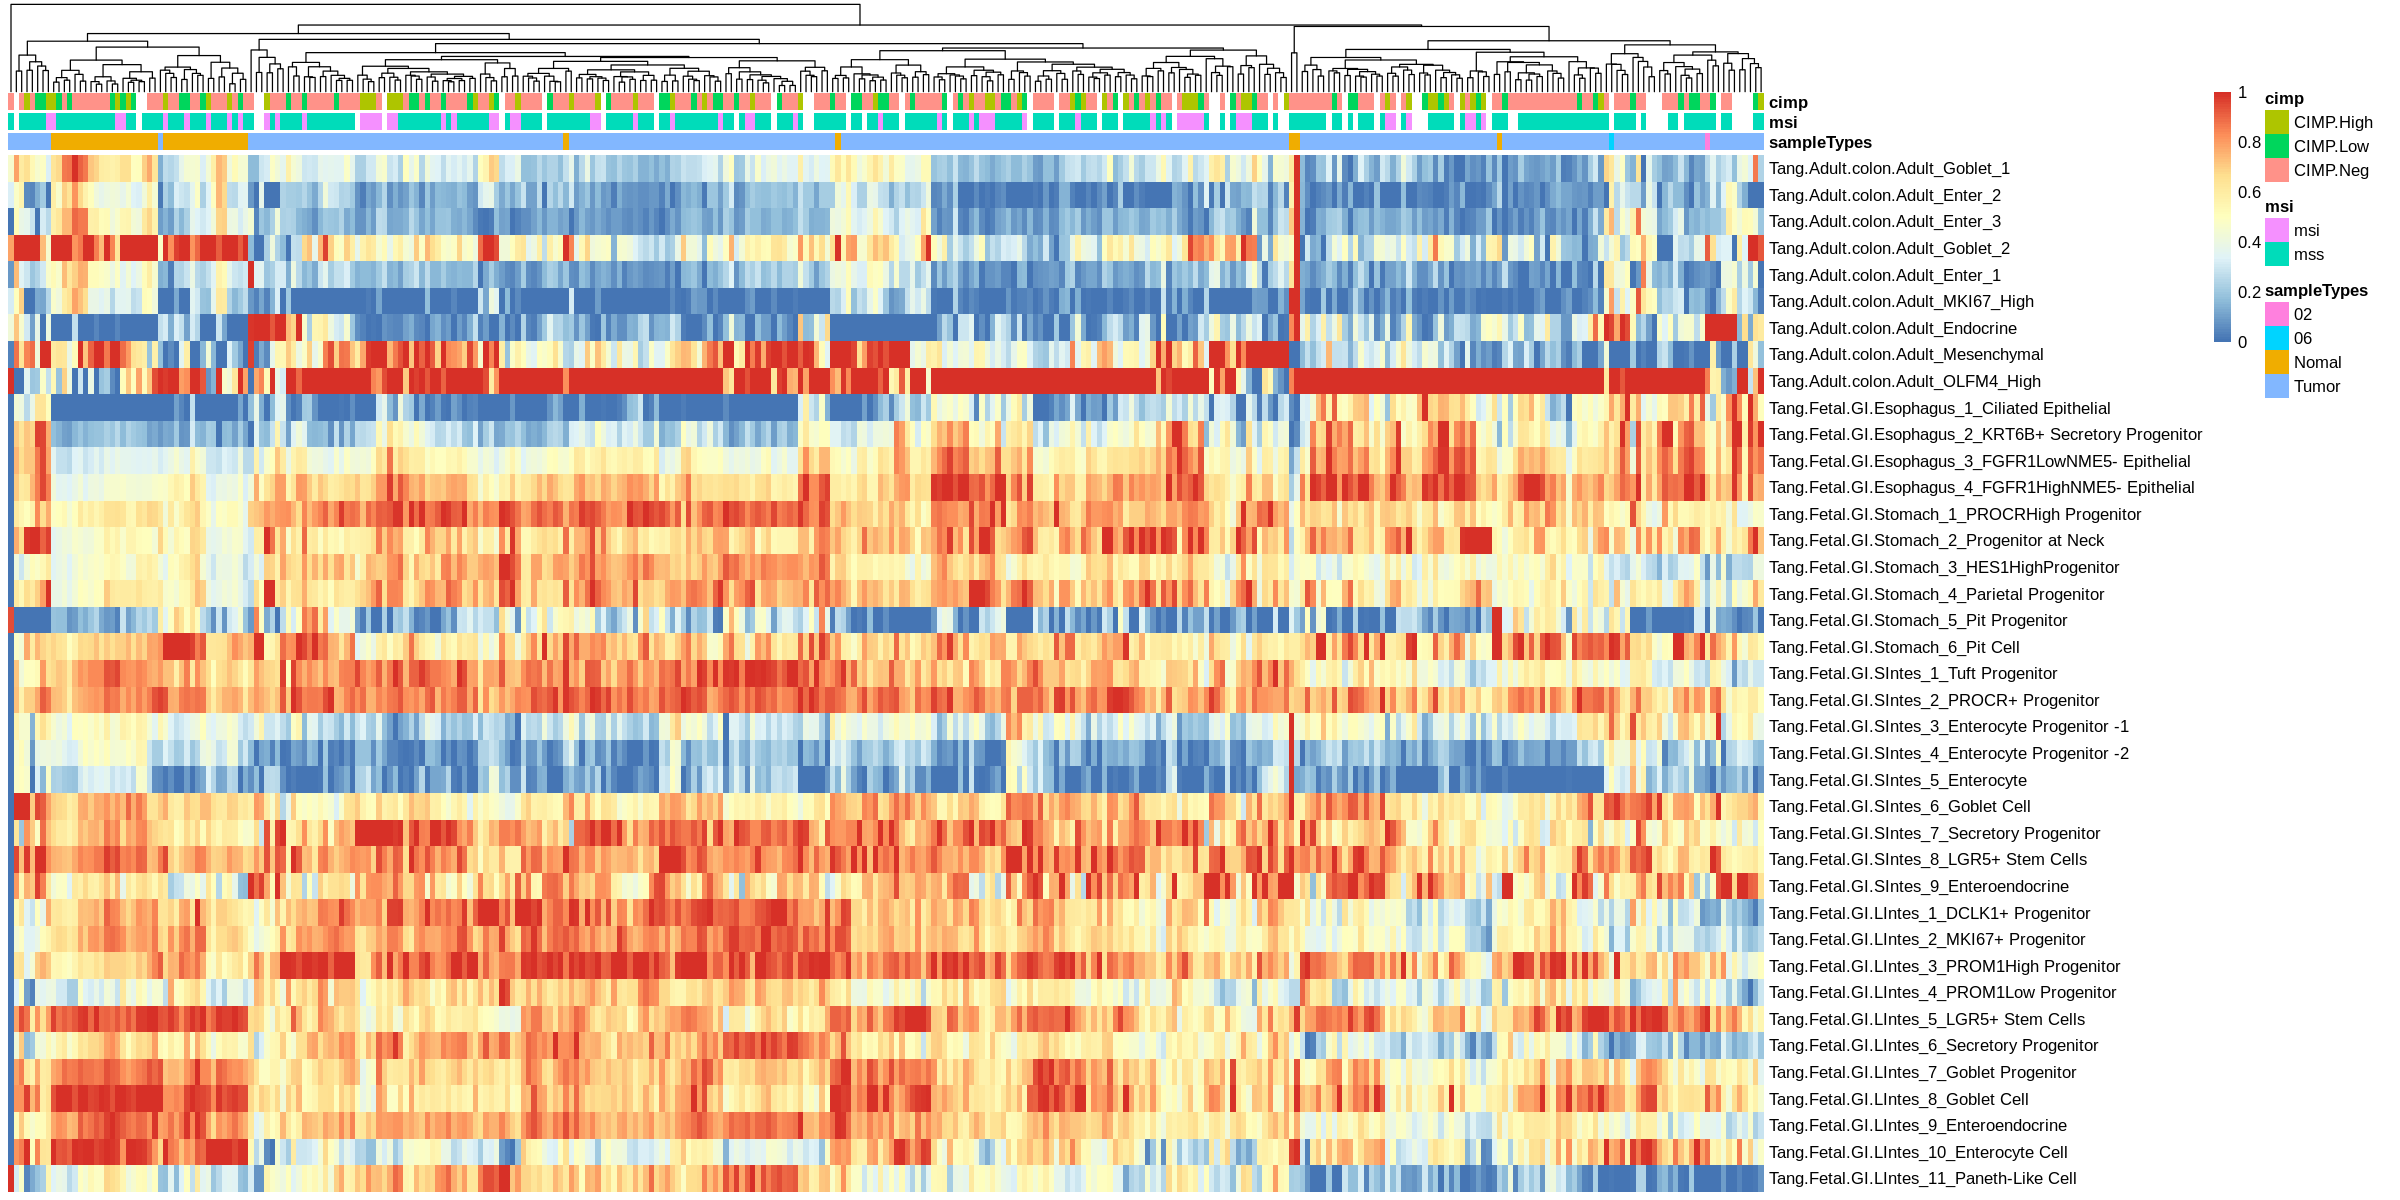

In [8]:
### Step1.Figure out the most appropriate dissimilarity measure 
hclust.Res <- hclust(dist(t(Trans.Rang1.cv2500_colon_InNormal), method="euclidean"), method="complete")
## Not good for dist(): "maximum","canberra","binary"
## Good for dist():"euclidean"="minkowski">"manhattan"
options(repr.plot.width=20, repr.plot.height=10)
Cluster.Res <- pheatmap::pheatmap(Trans.Rang1.cv2500_colon_InNormal,annotation_col = COAD.pheno.tumor,
                                  cluster_cols = hclust.Res,
                                  show_colnames = F,cluster_rows = F,scale = "none")

Loading required package: pheatmap
Loading required package: survminer
Loading required package: ggplot2
Loading required package: ggpubr
Loading required package: magrittr
Loading required package: survival


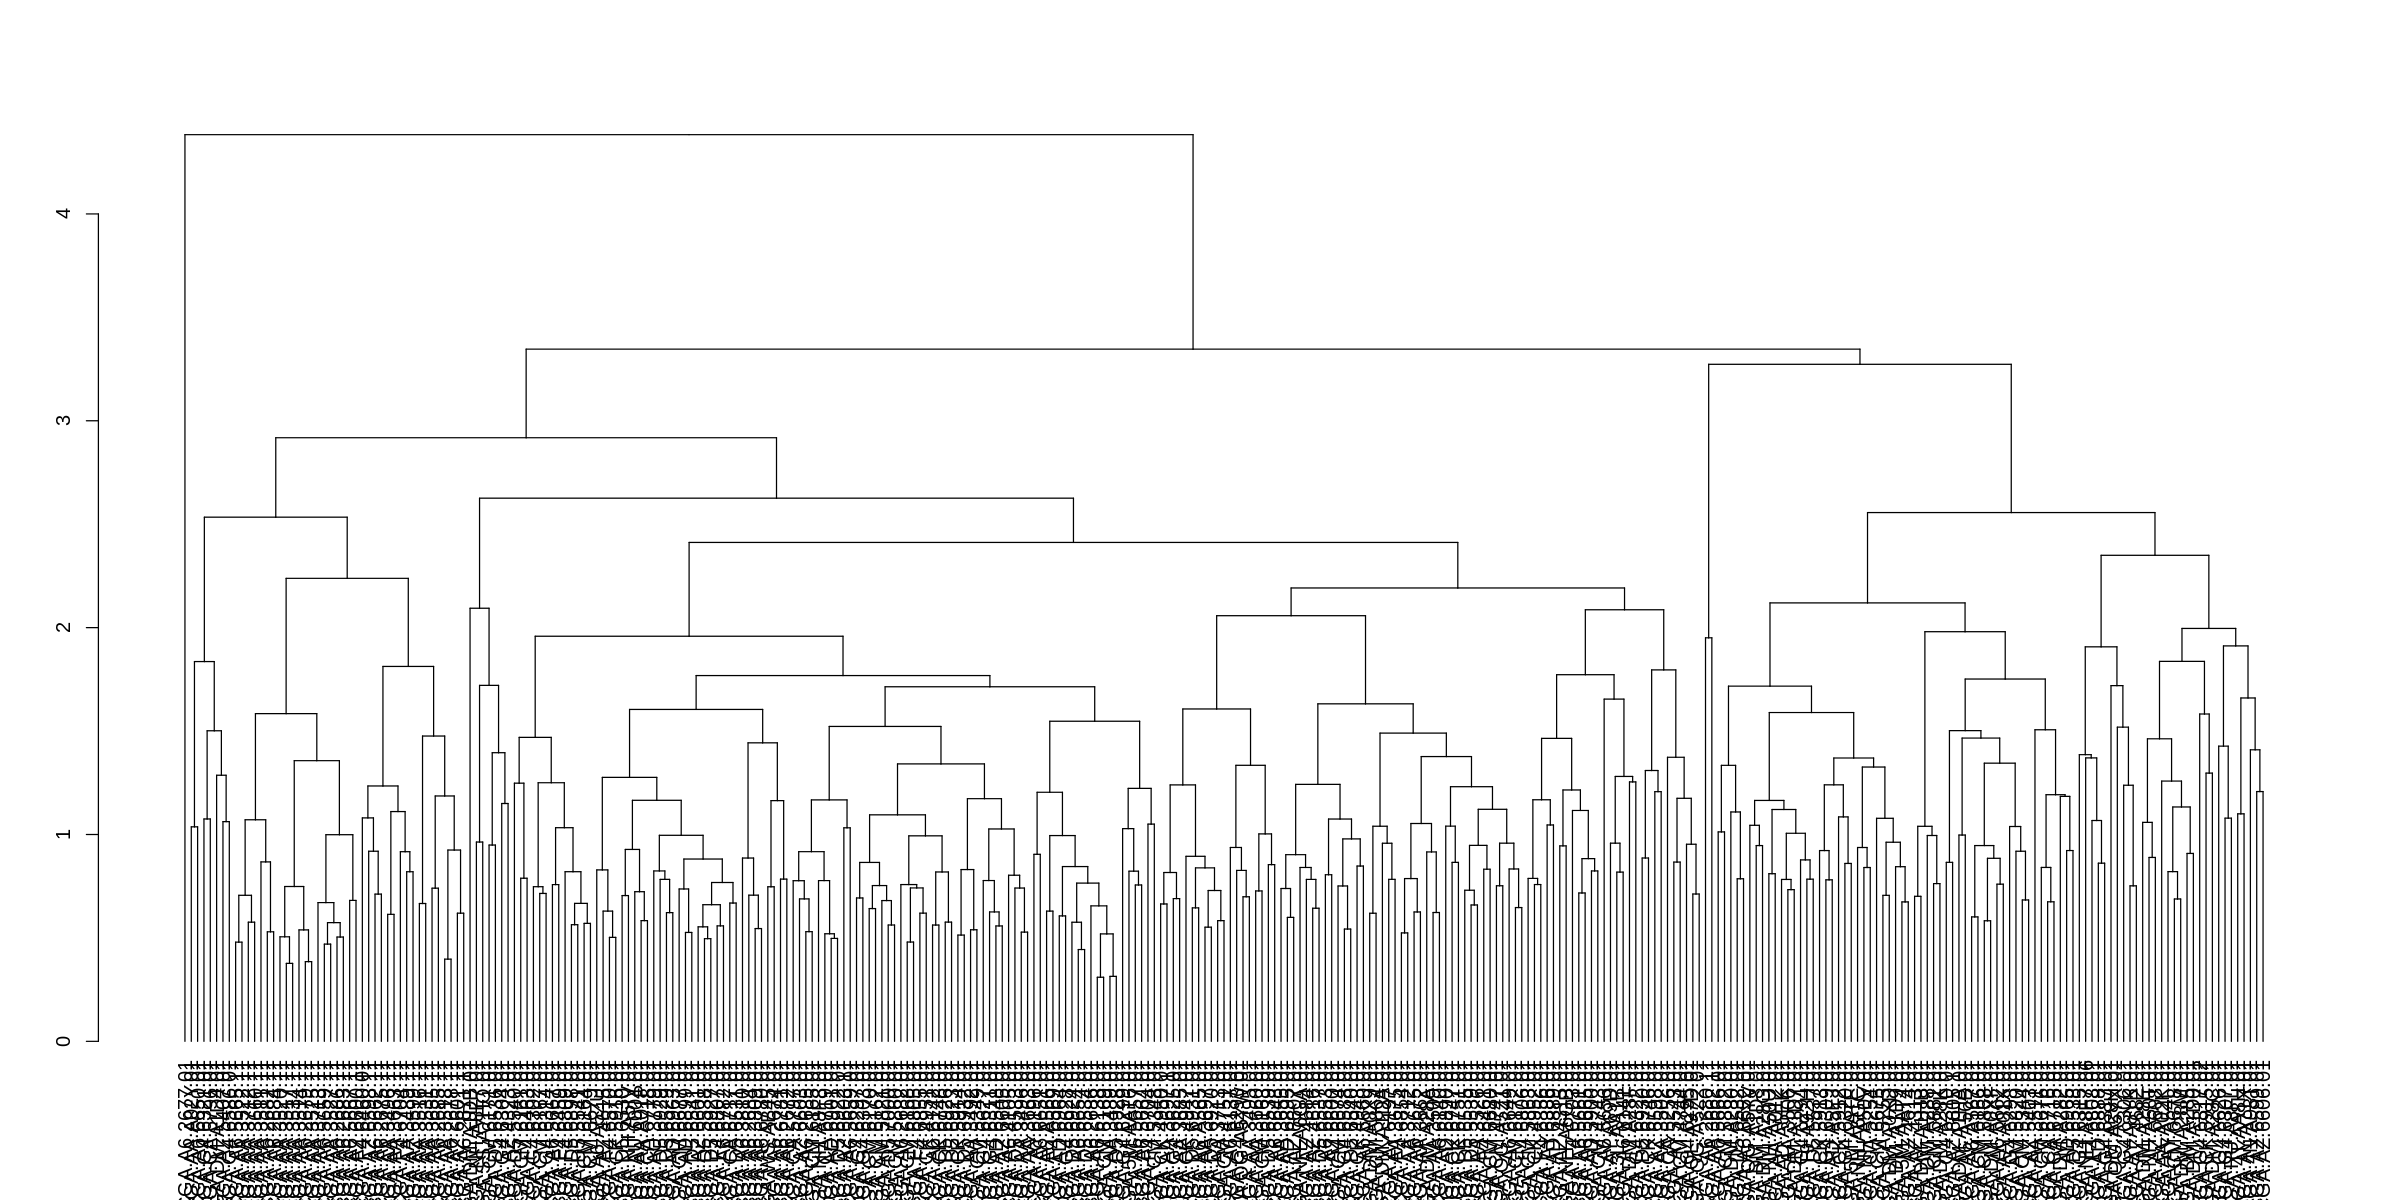

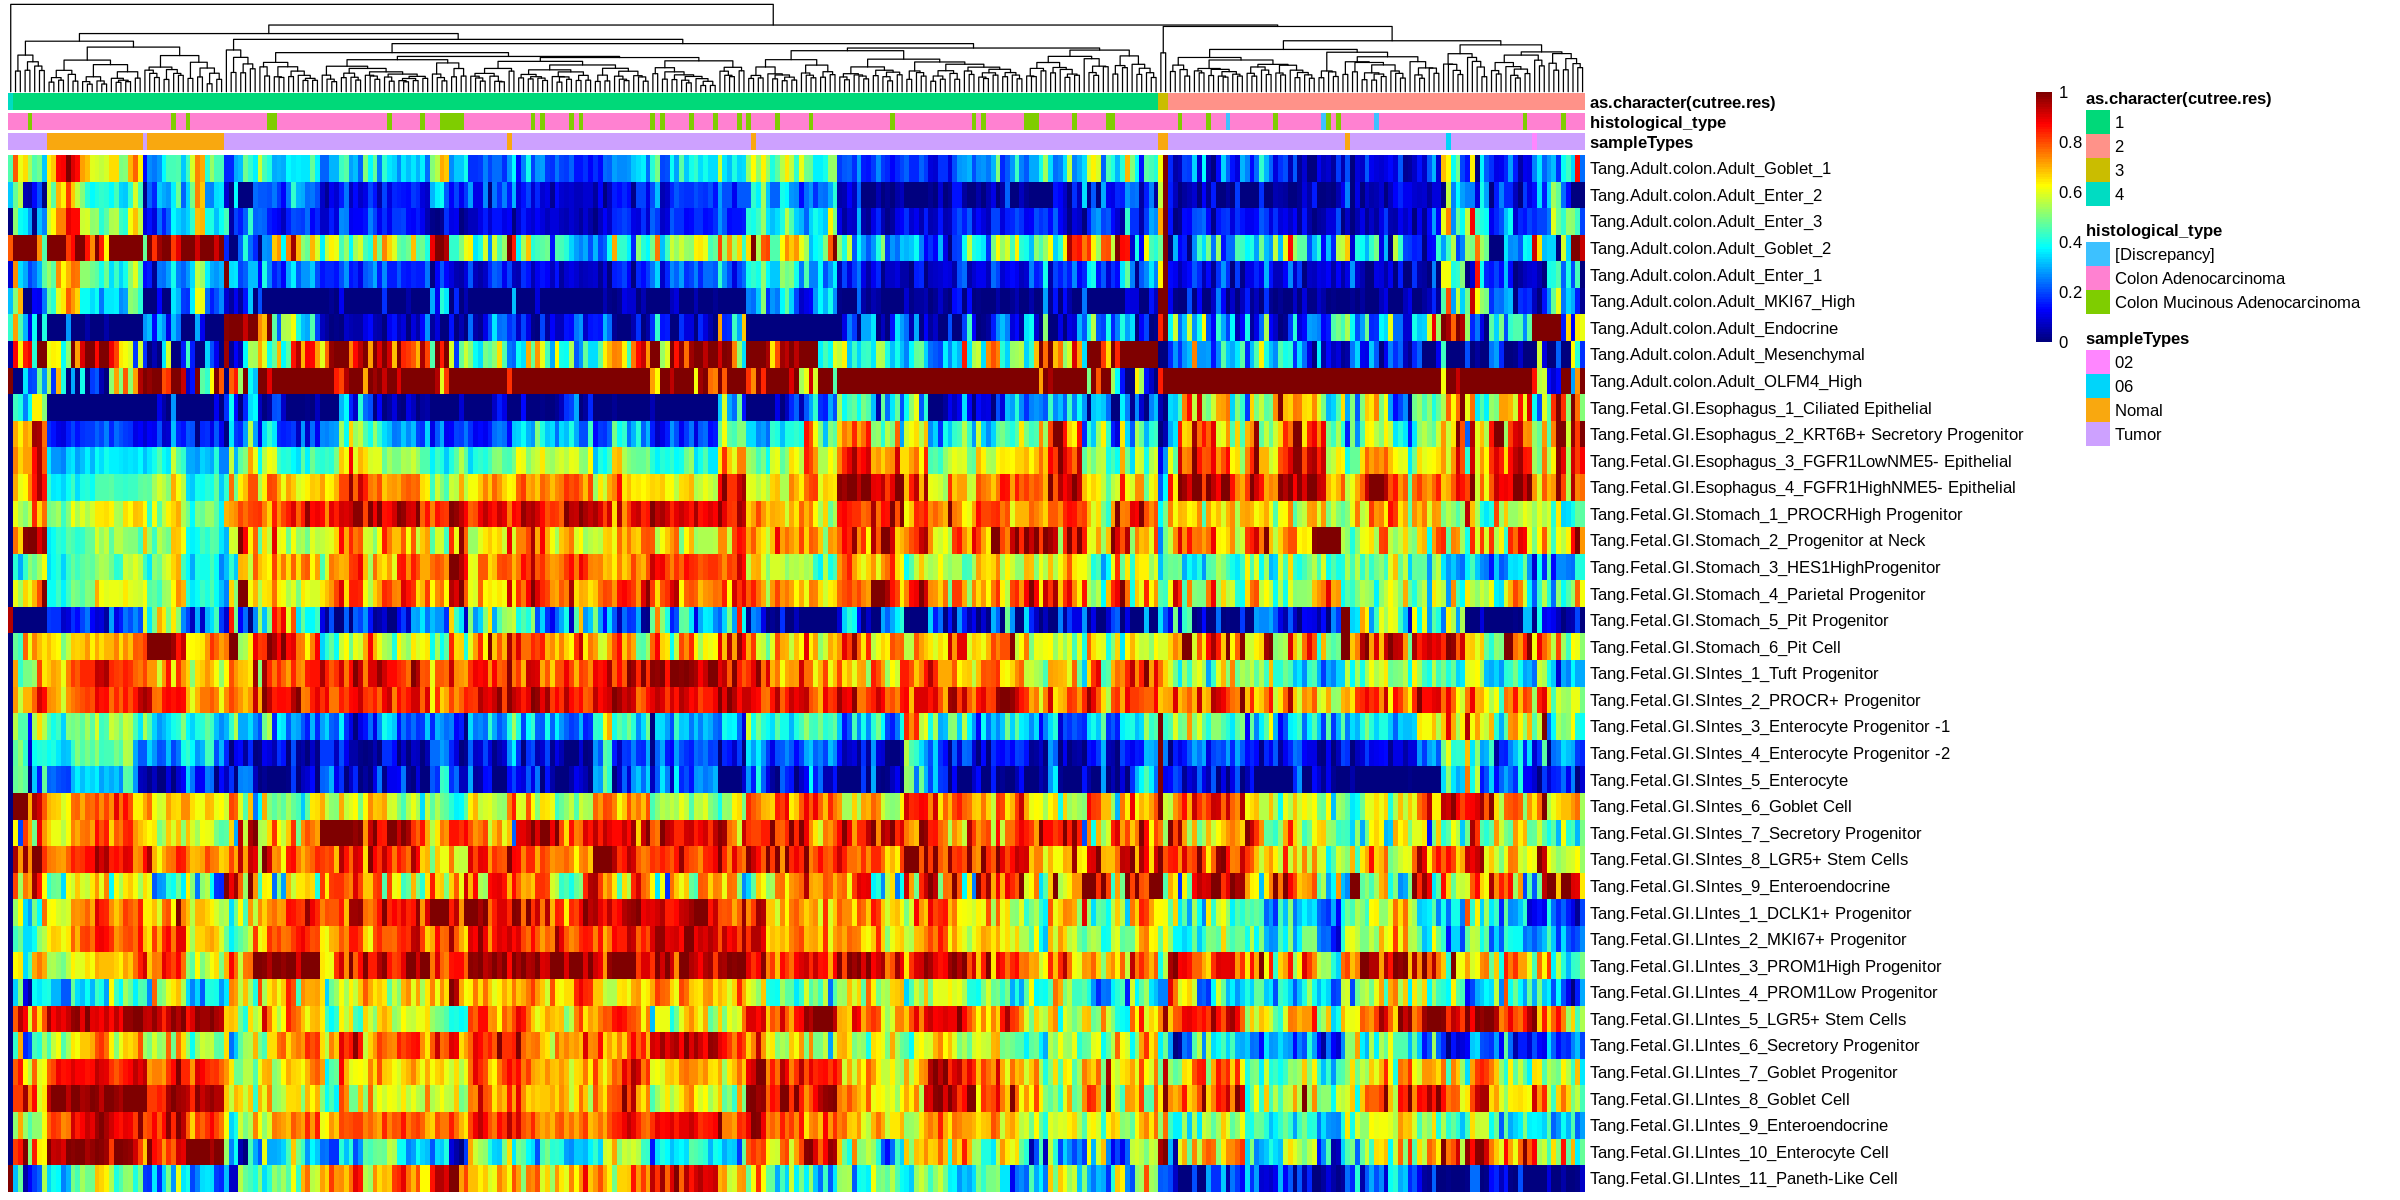

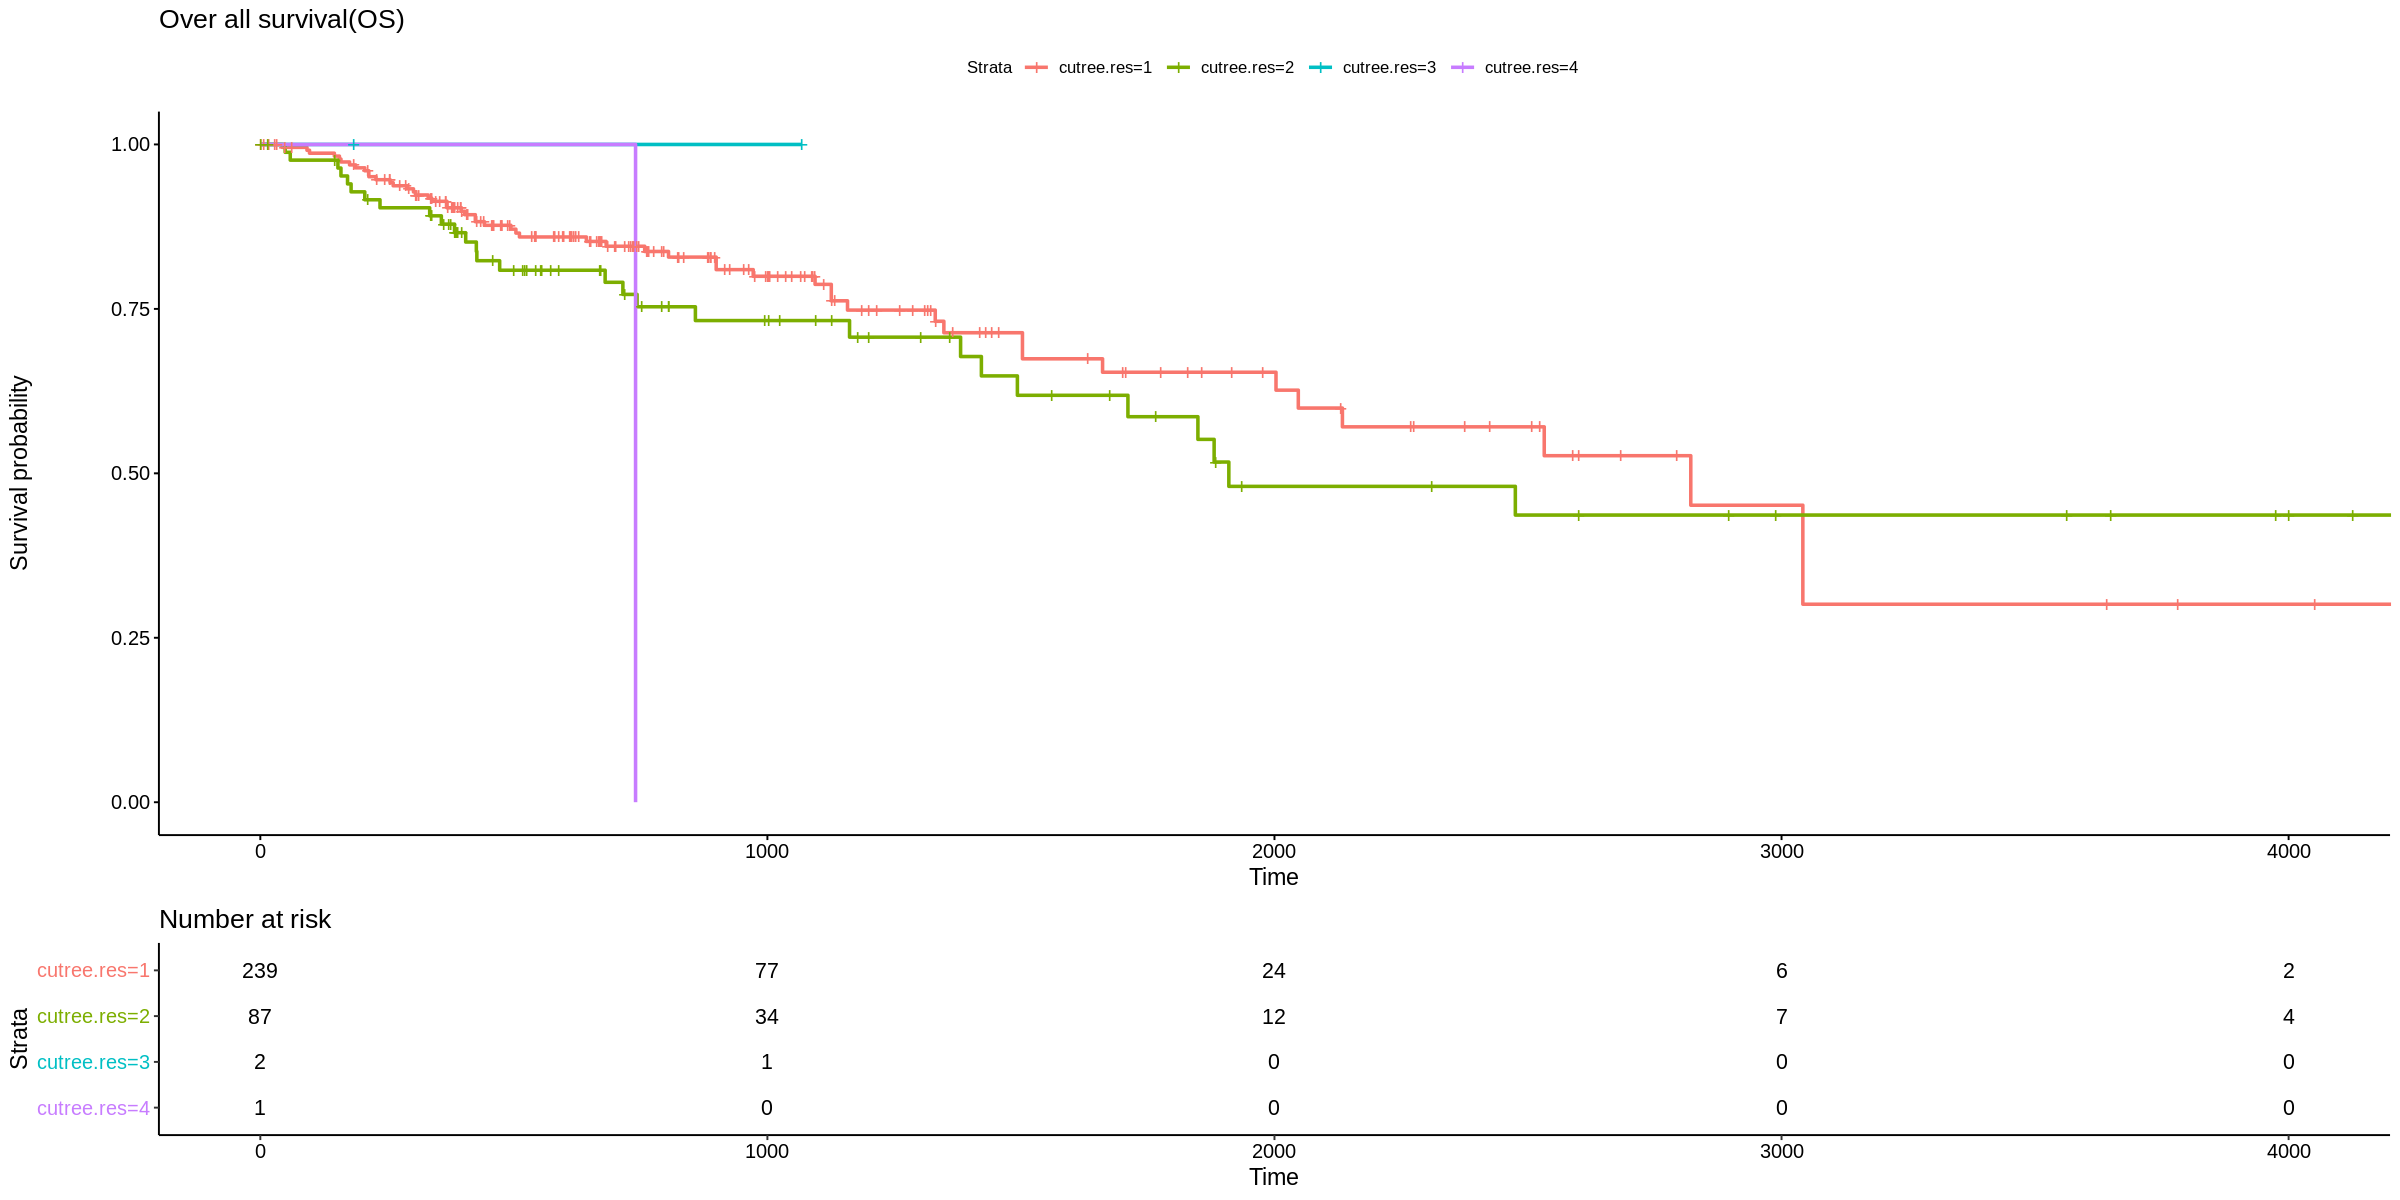

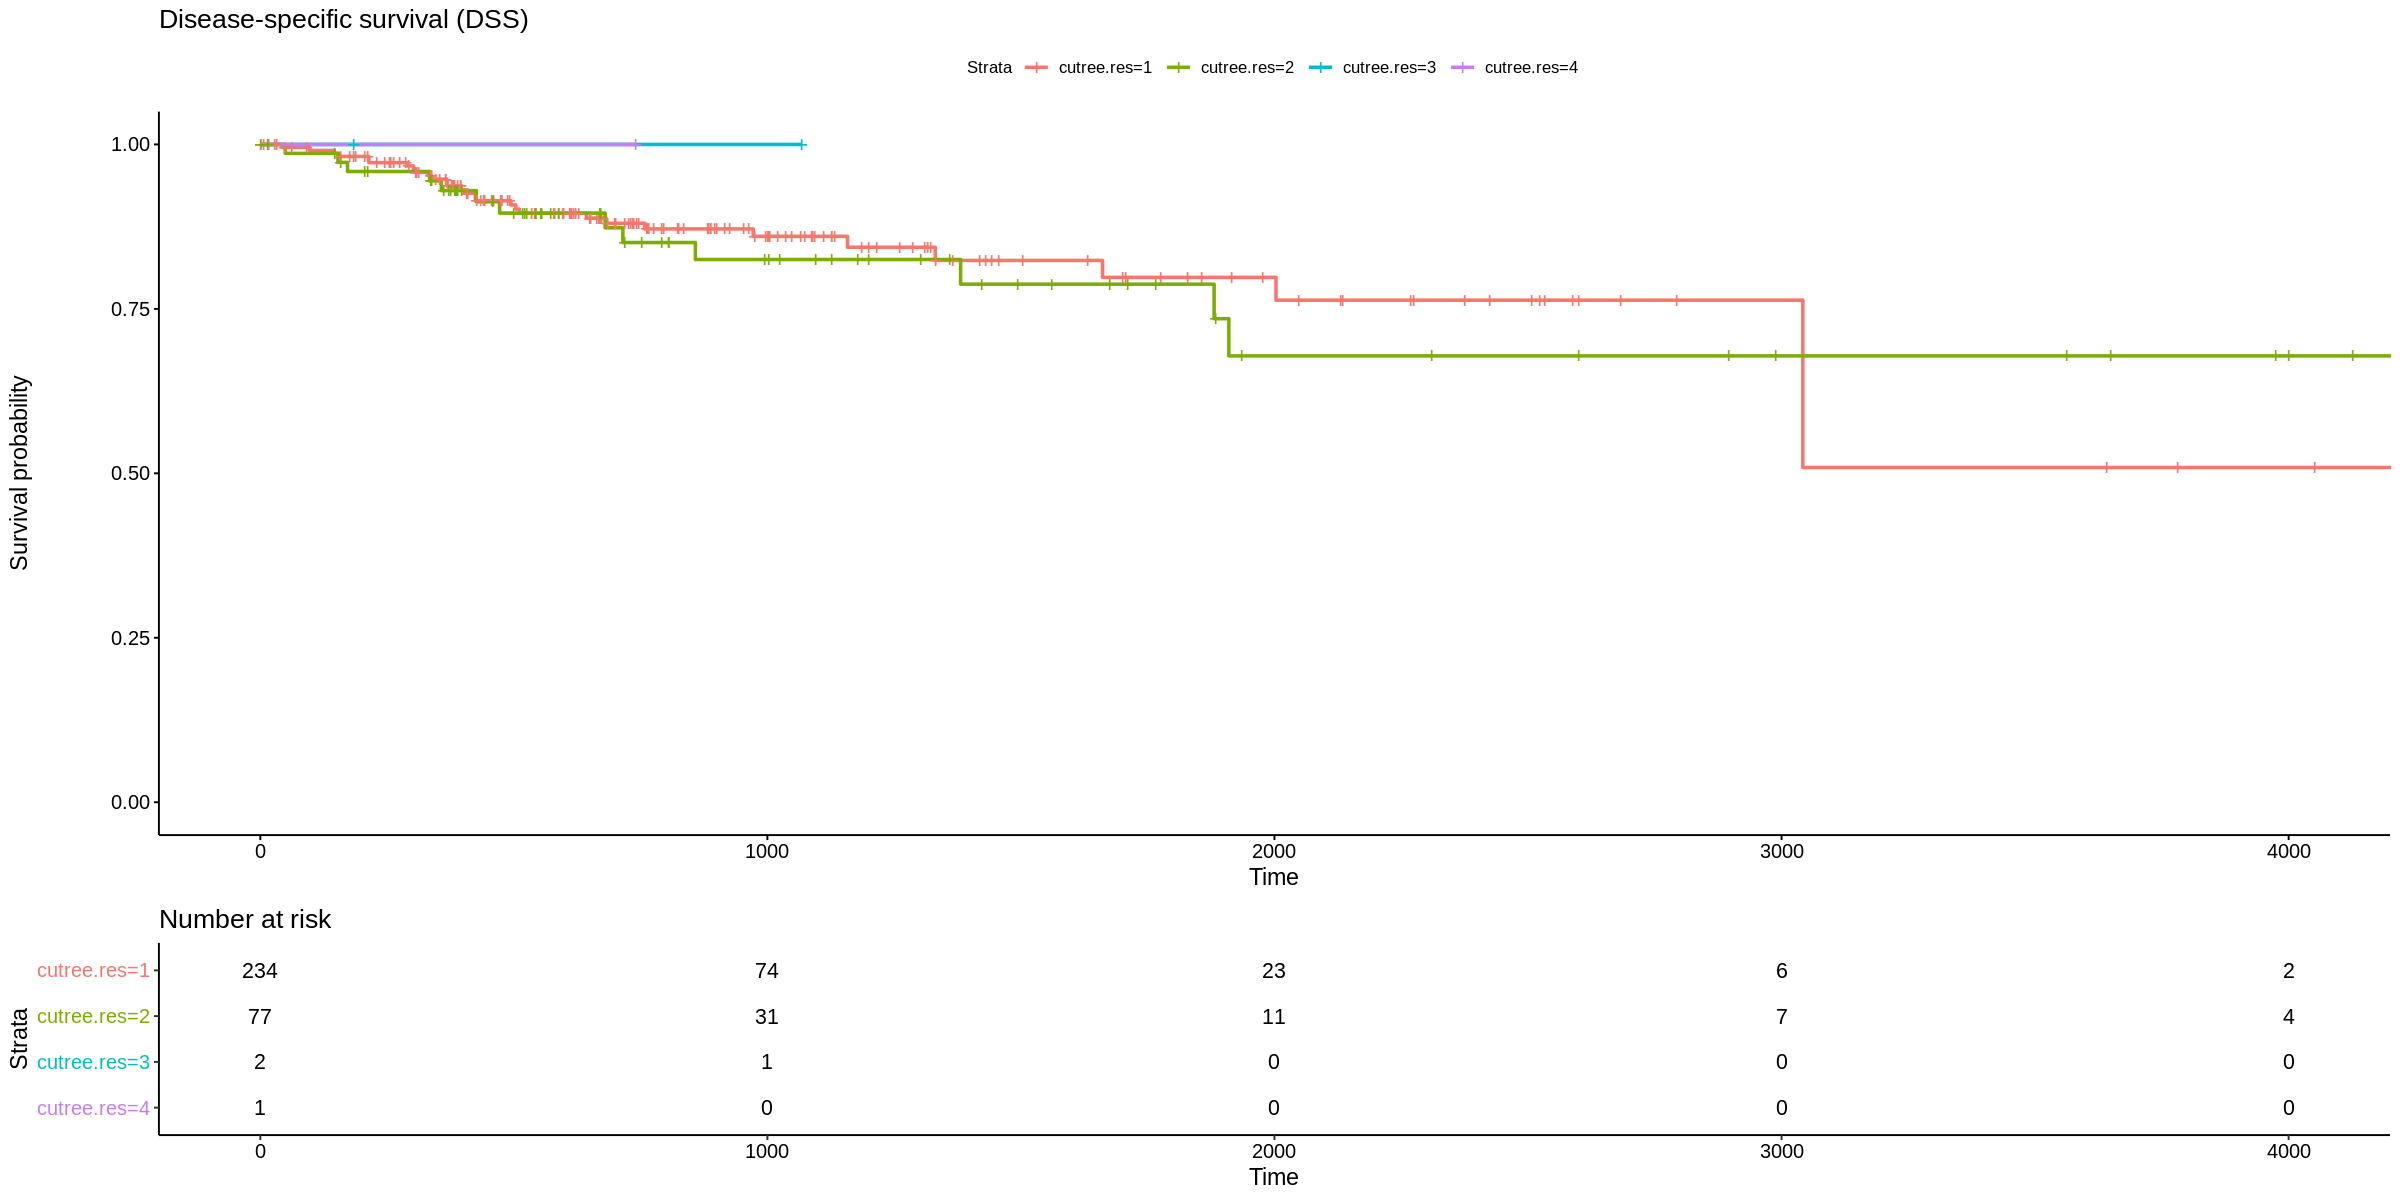

[[1]]

[[2]]

[[3]]

[[4]]

attr(,"class")
[1] "list"            "ggsurvplot_list"

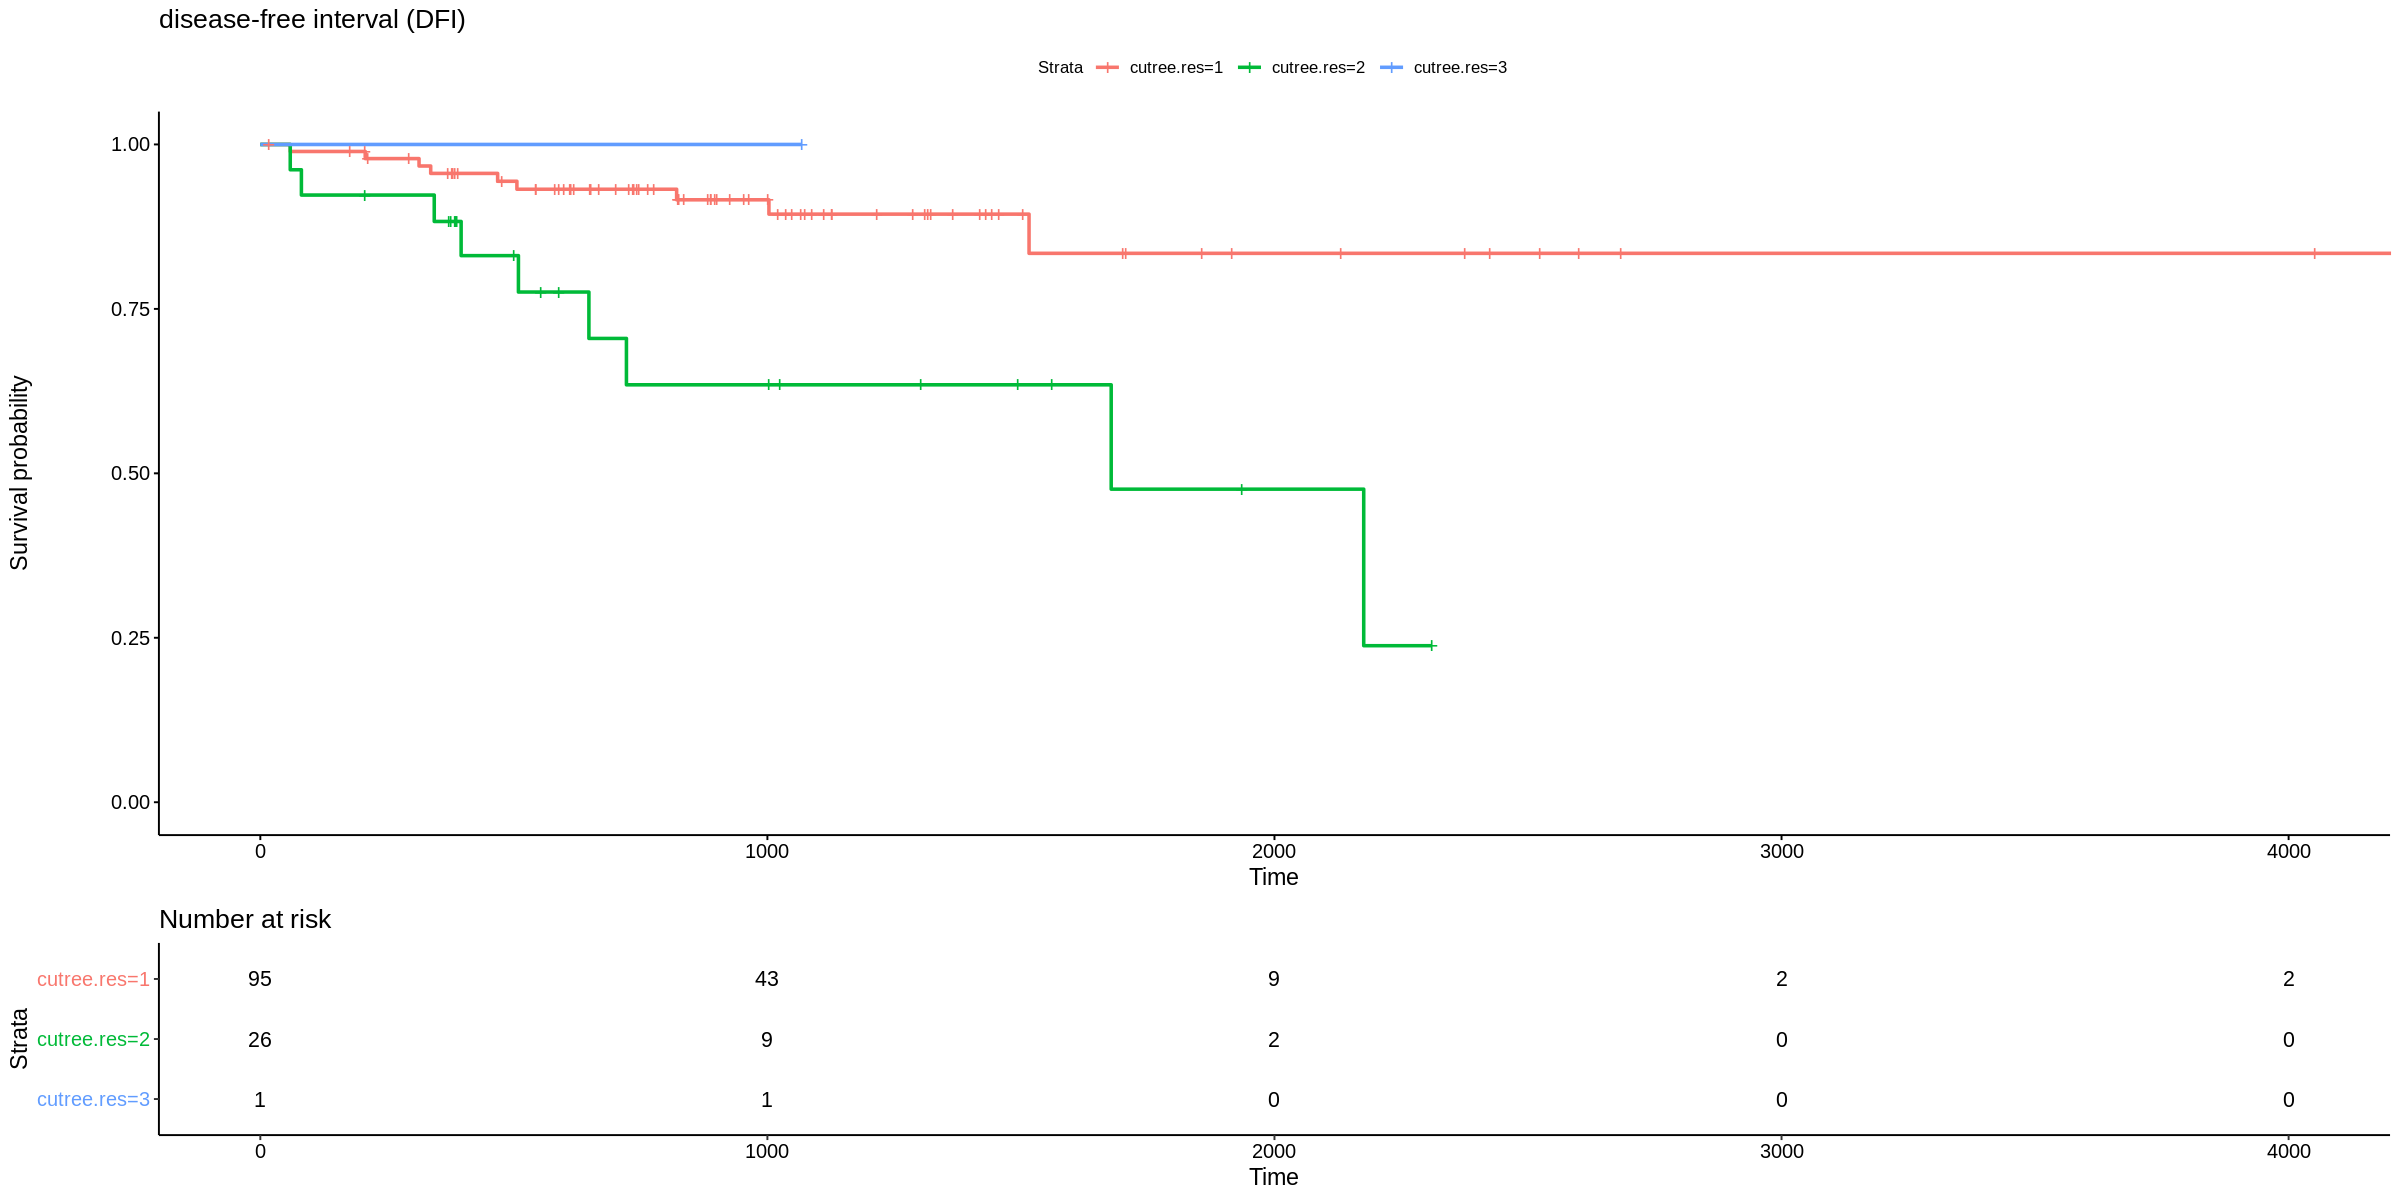

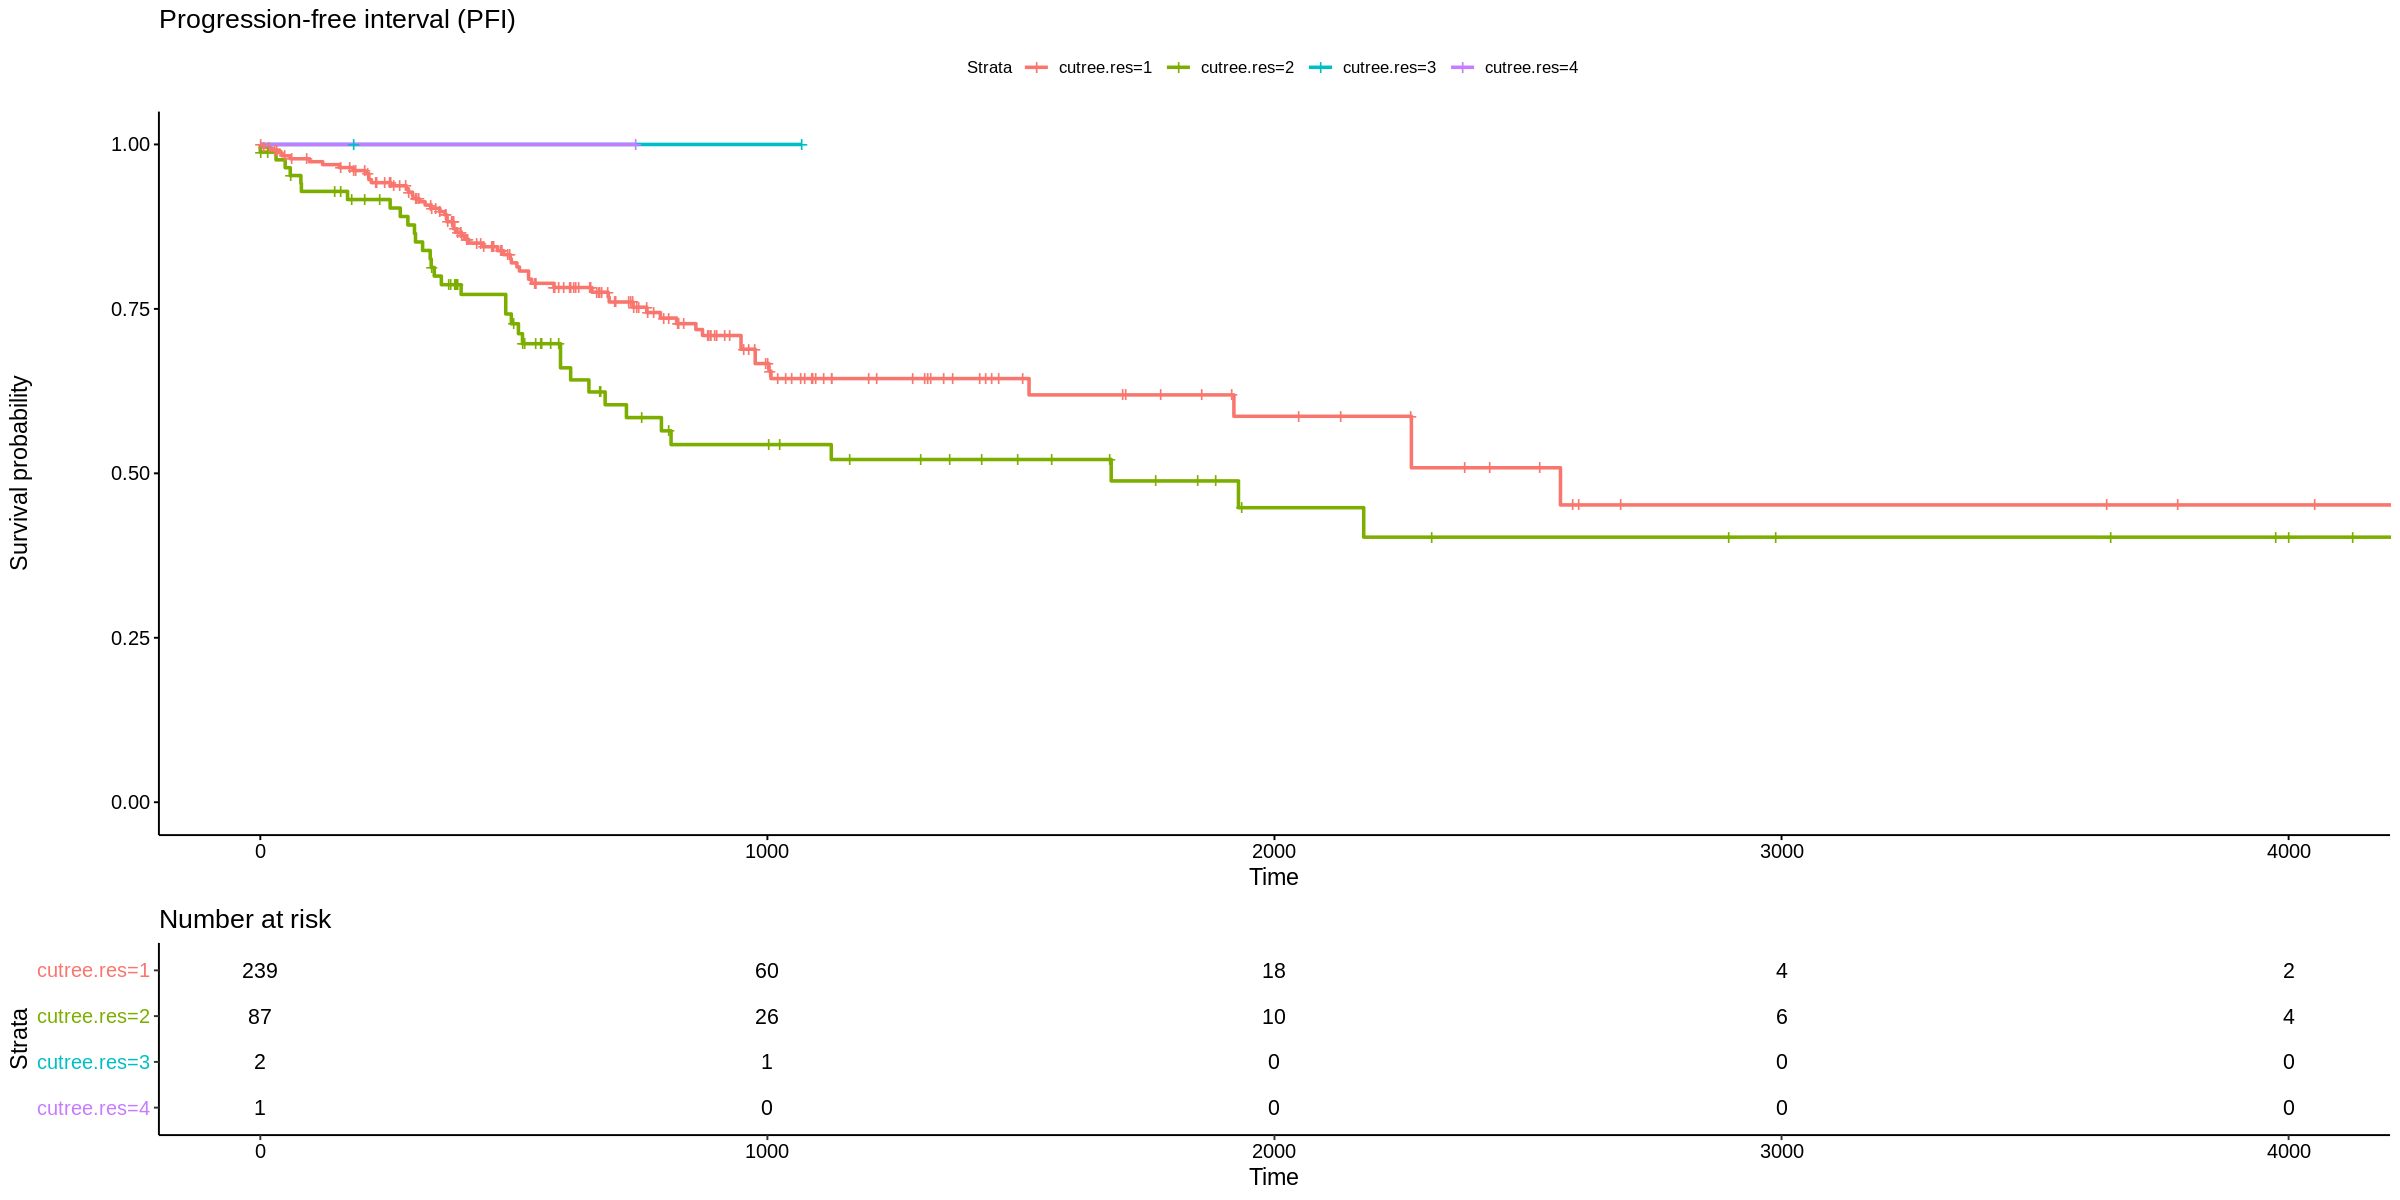

In [11]:
source("/data8t_4/JH/MyJobs/1_R_script/TCGA_plot/TCGAClusterSurv.R")
TCGAClusterSurv(Input.tb = Trans.Rang1.cv2500_colon_InNormal, hclust.res = hclust.Res, Col.anno = COAD.pheno, k = 4)


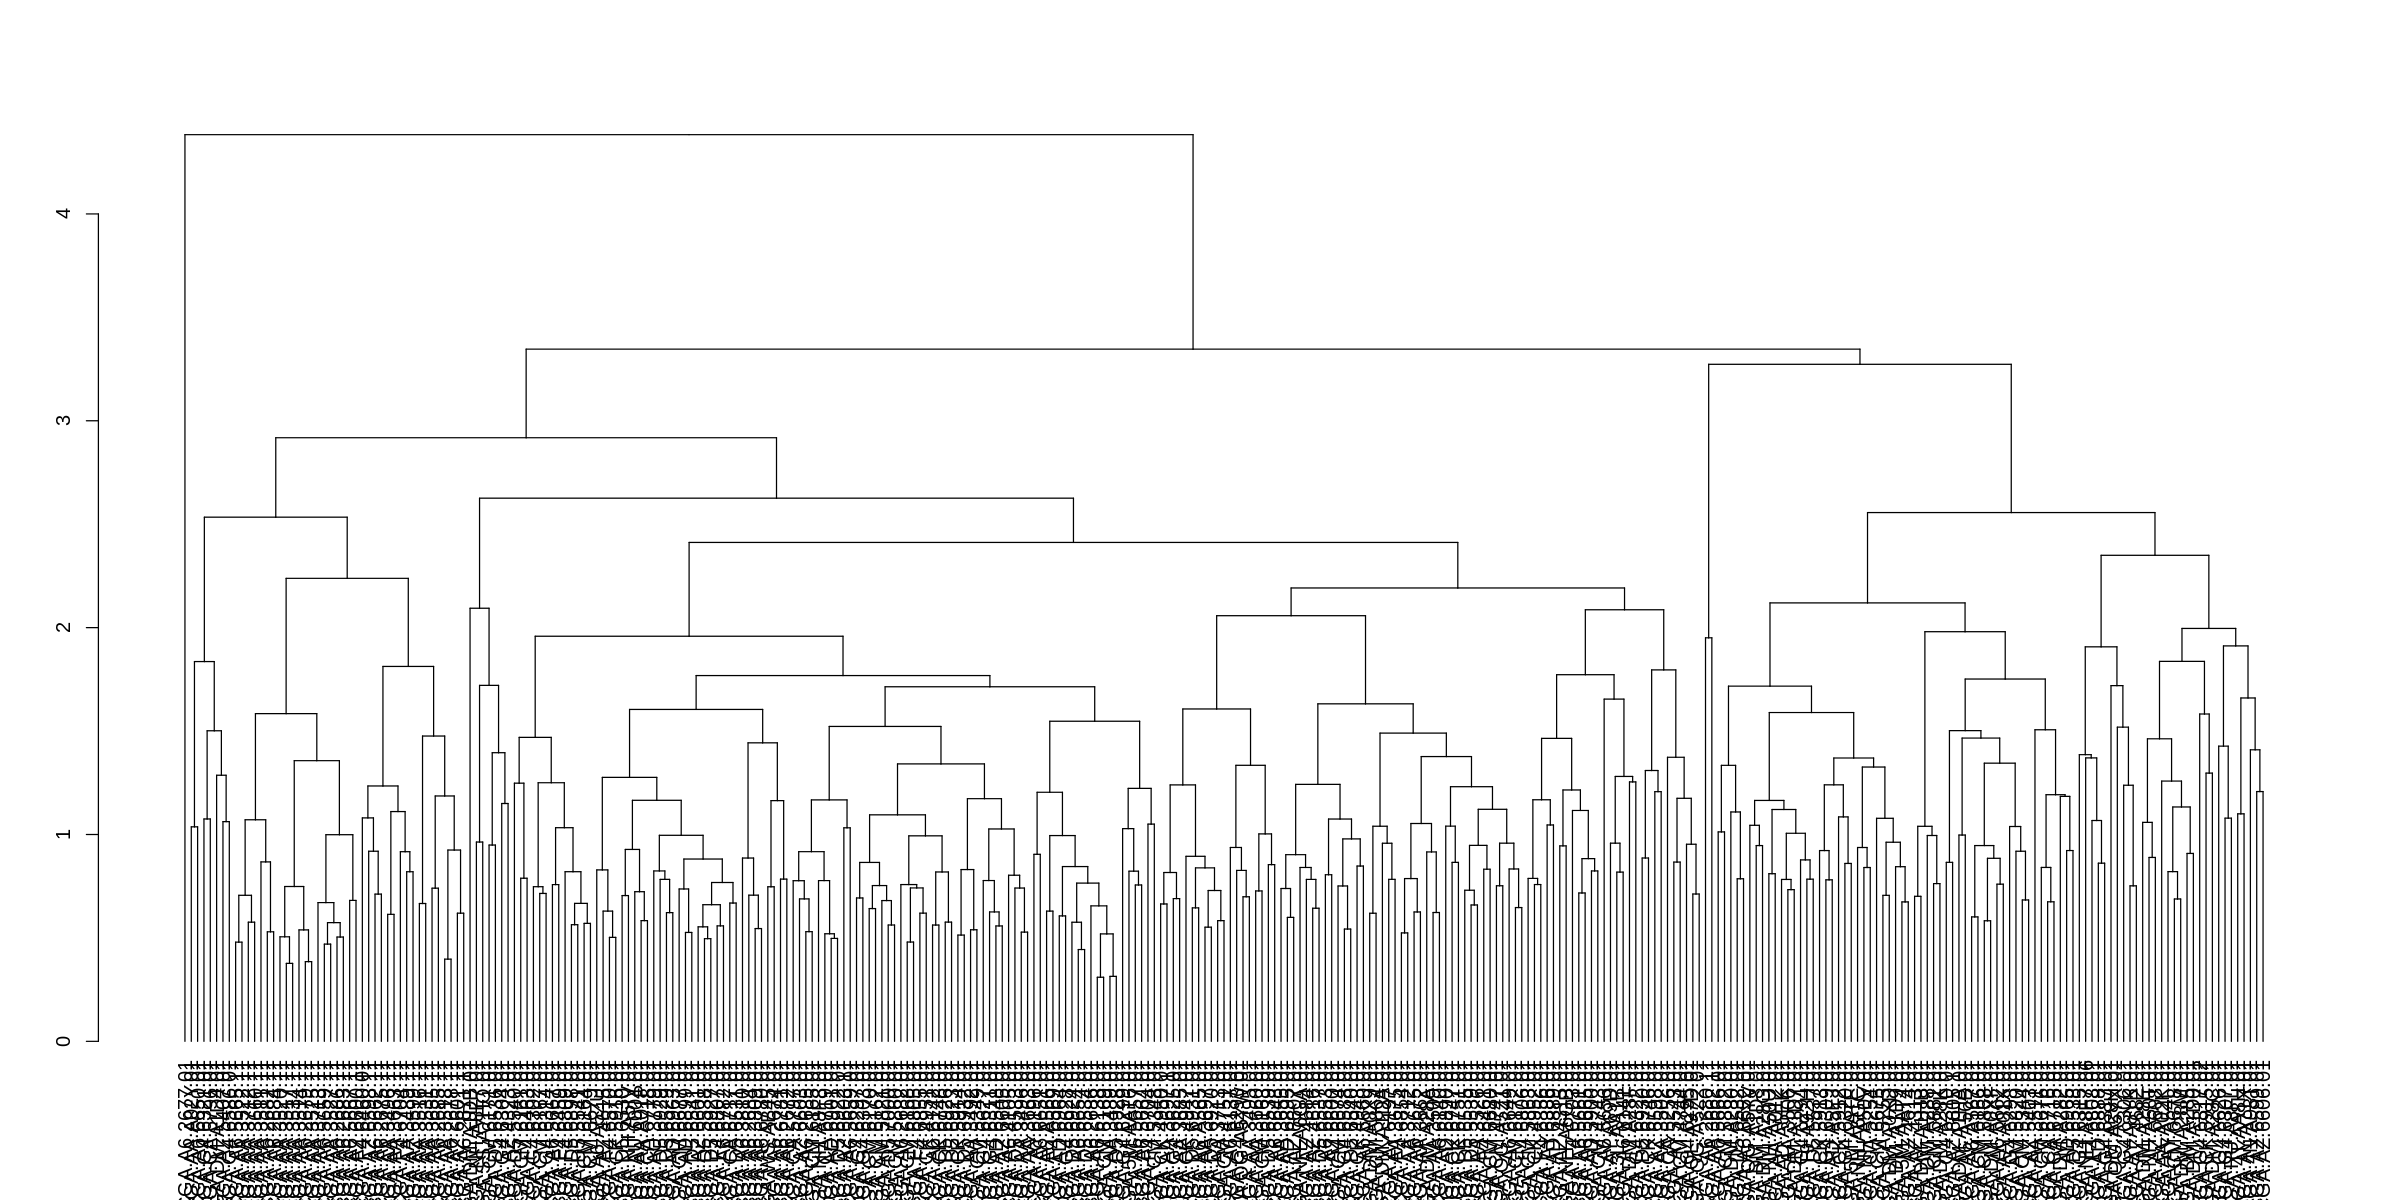

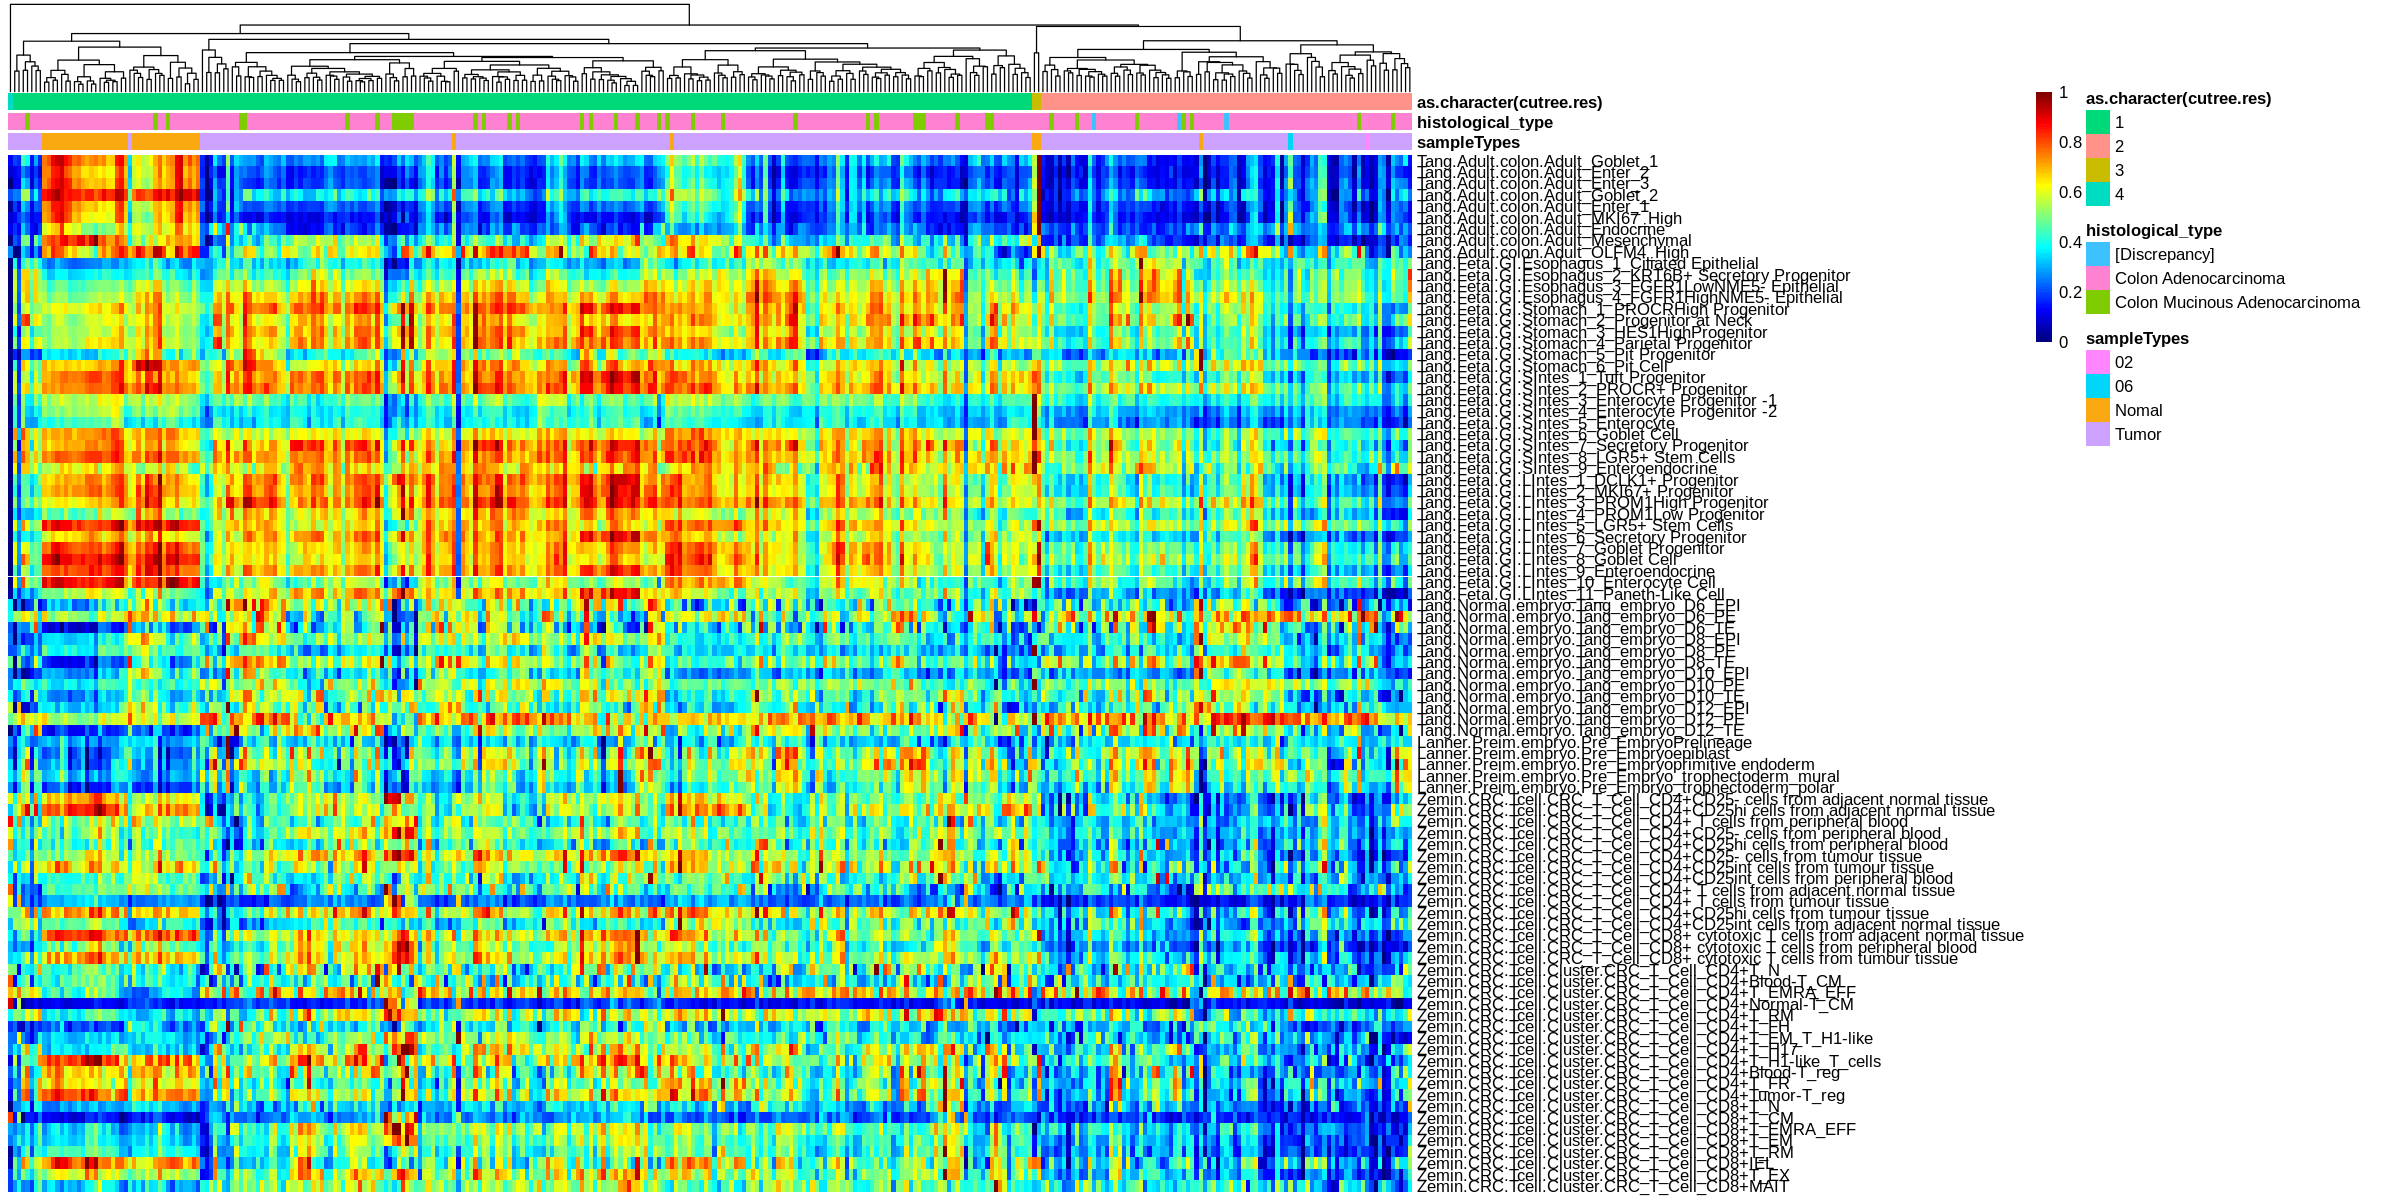

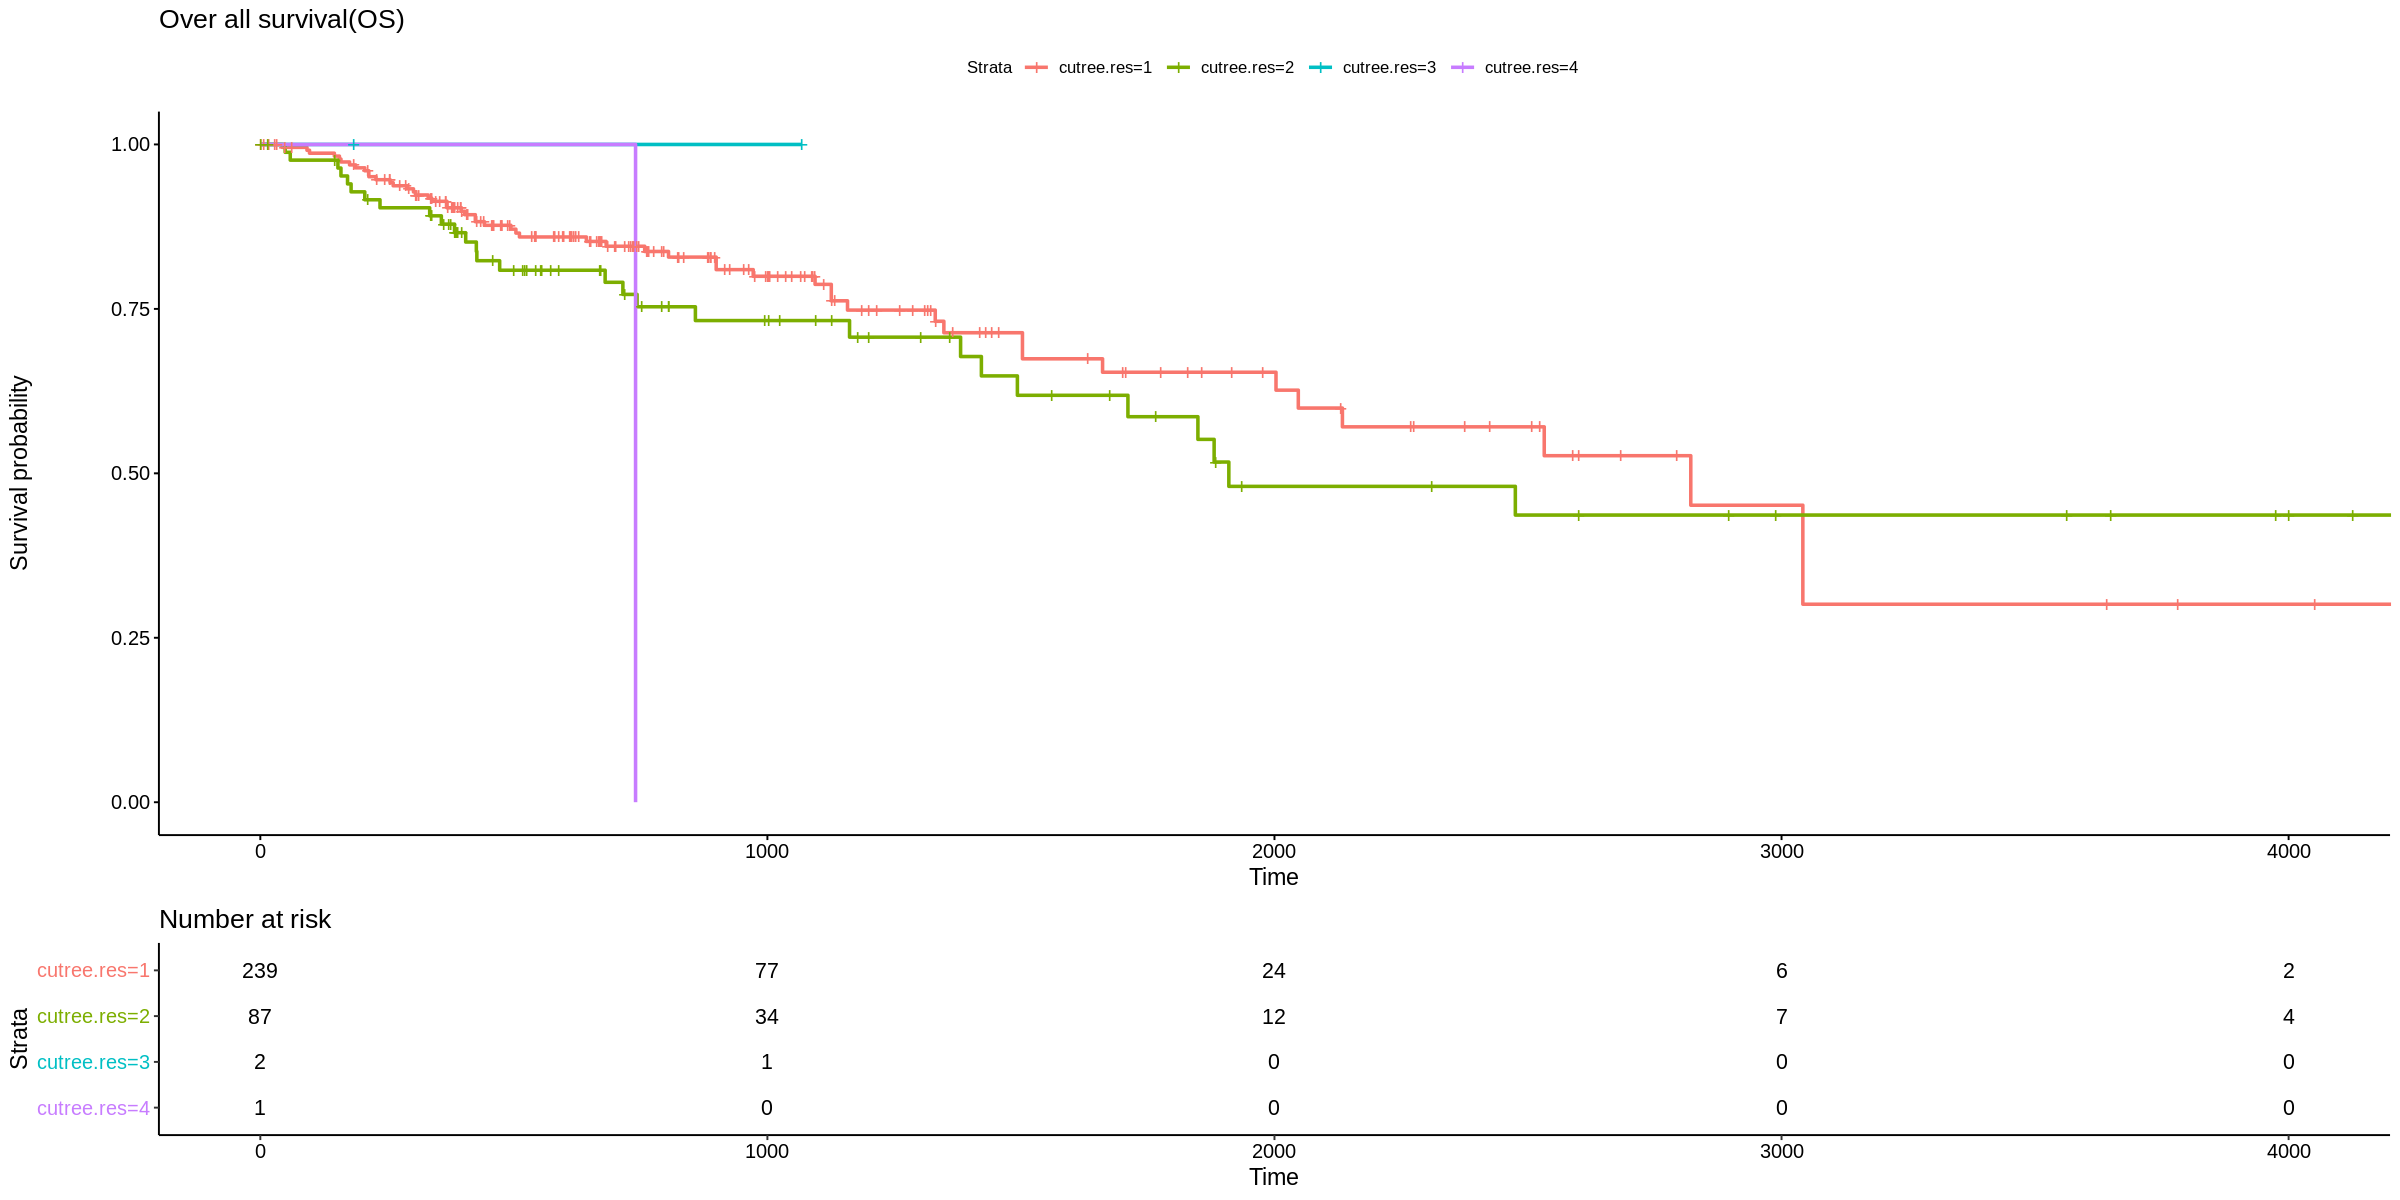

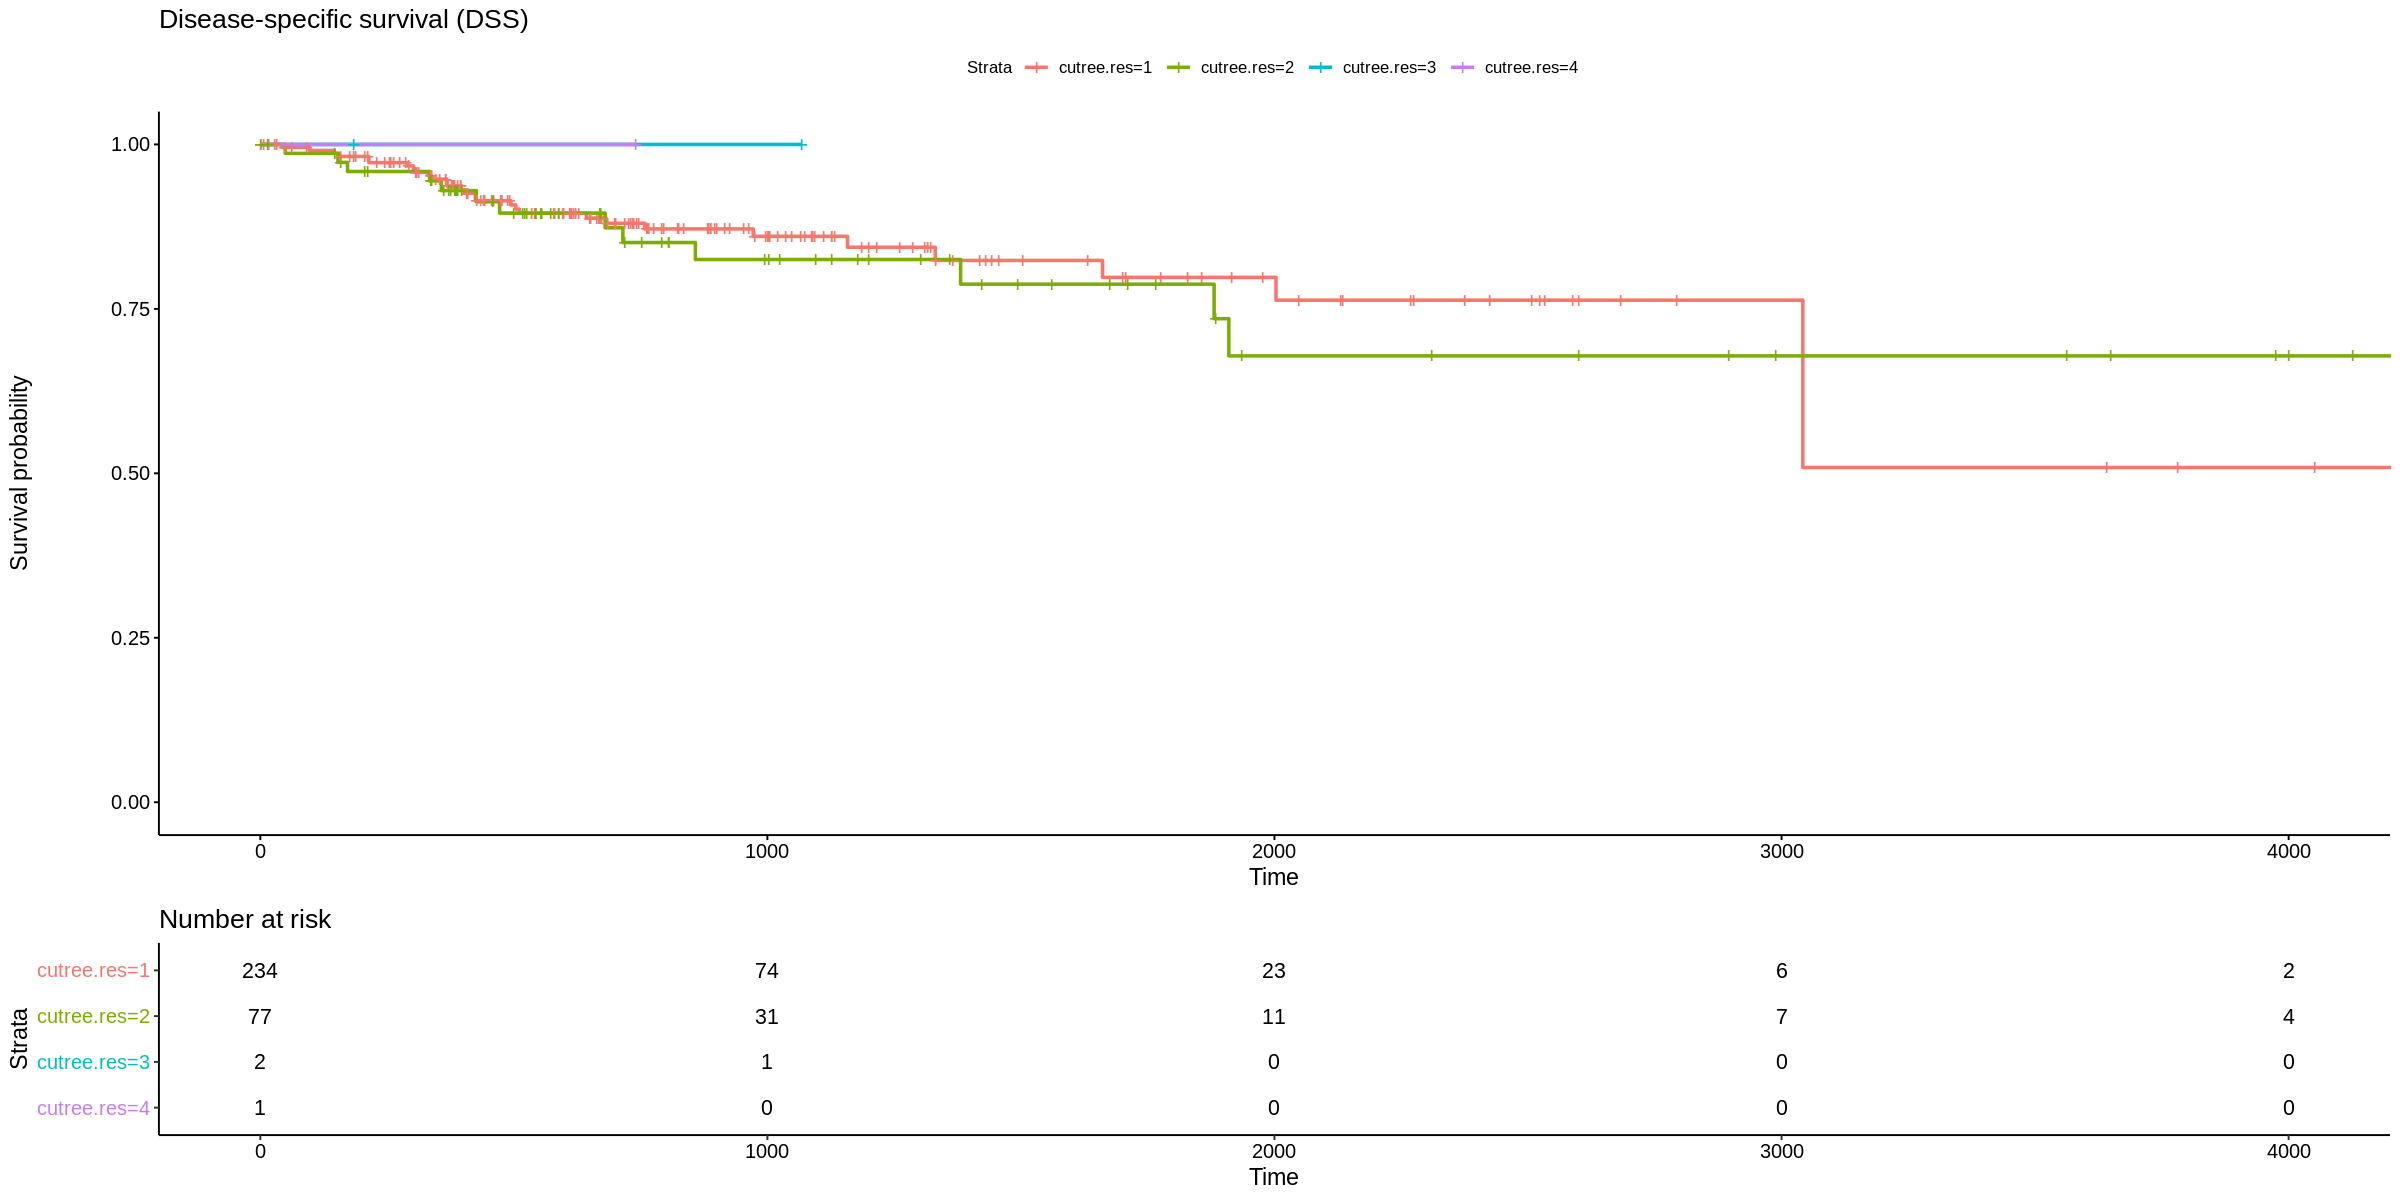

[[1]]

[[2]]

[[3]]

[[4]]

attr(,"class")
[1] "list"            "ggsurvplot_list"

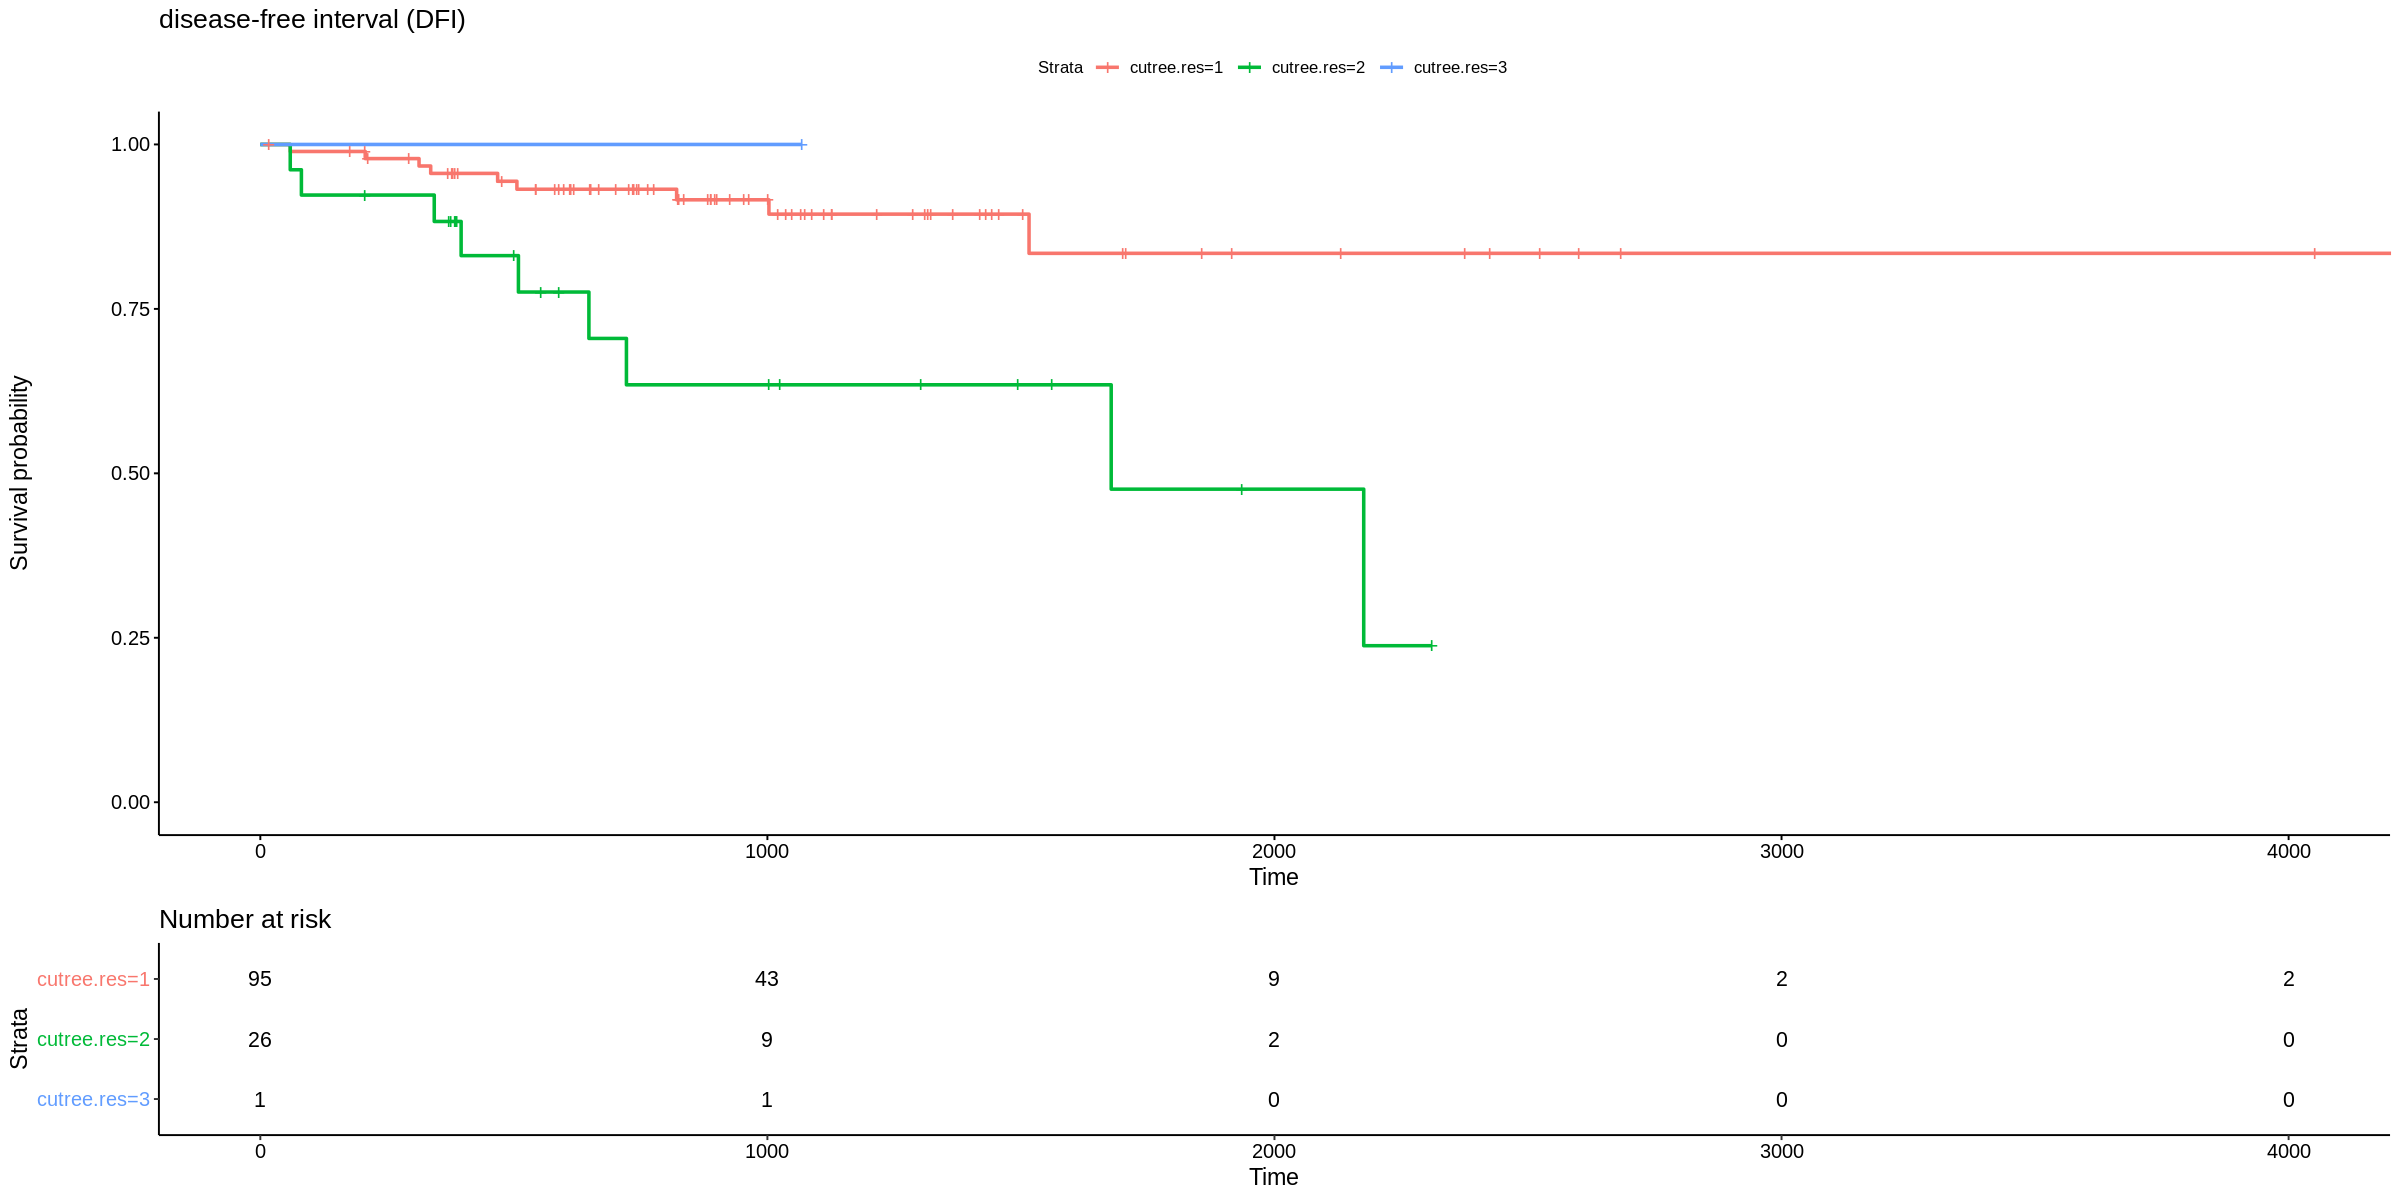

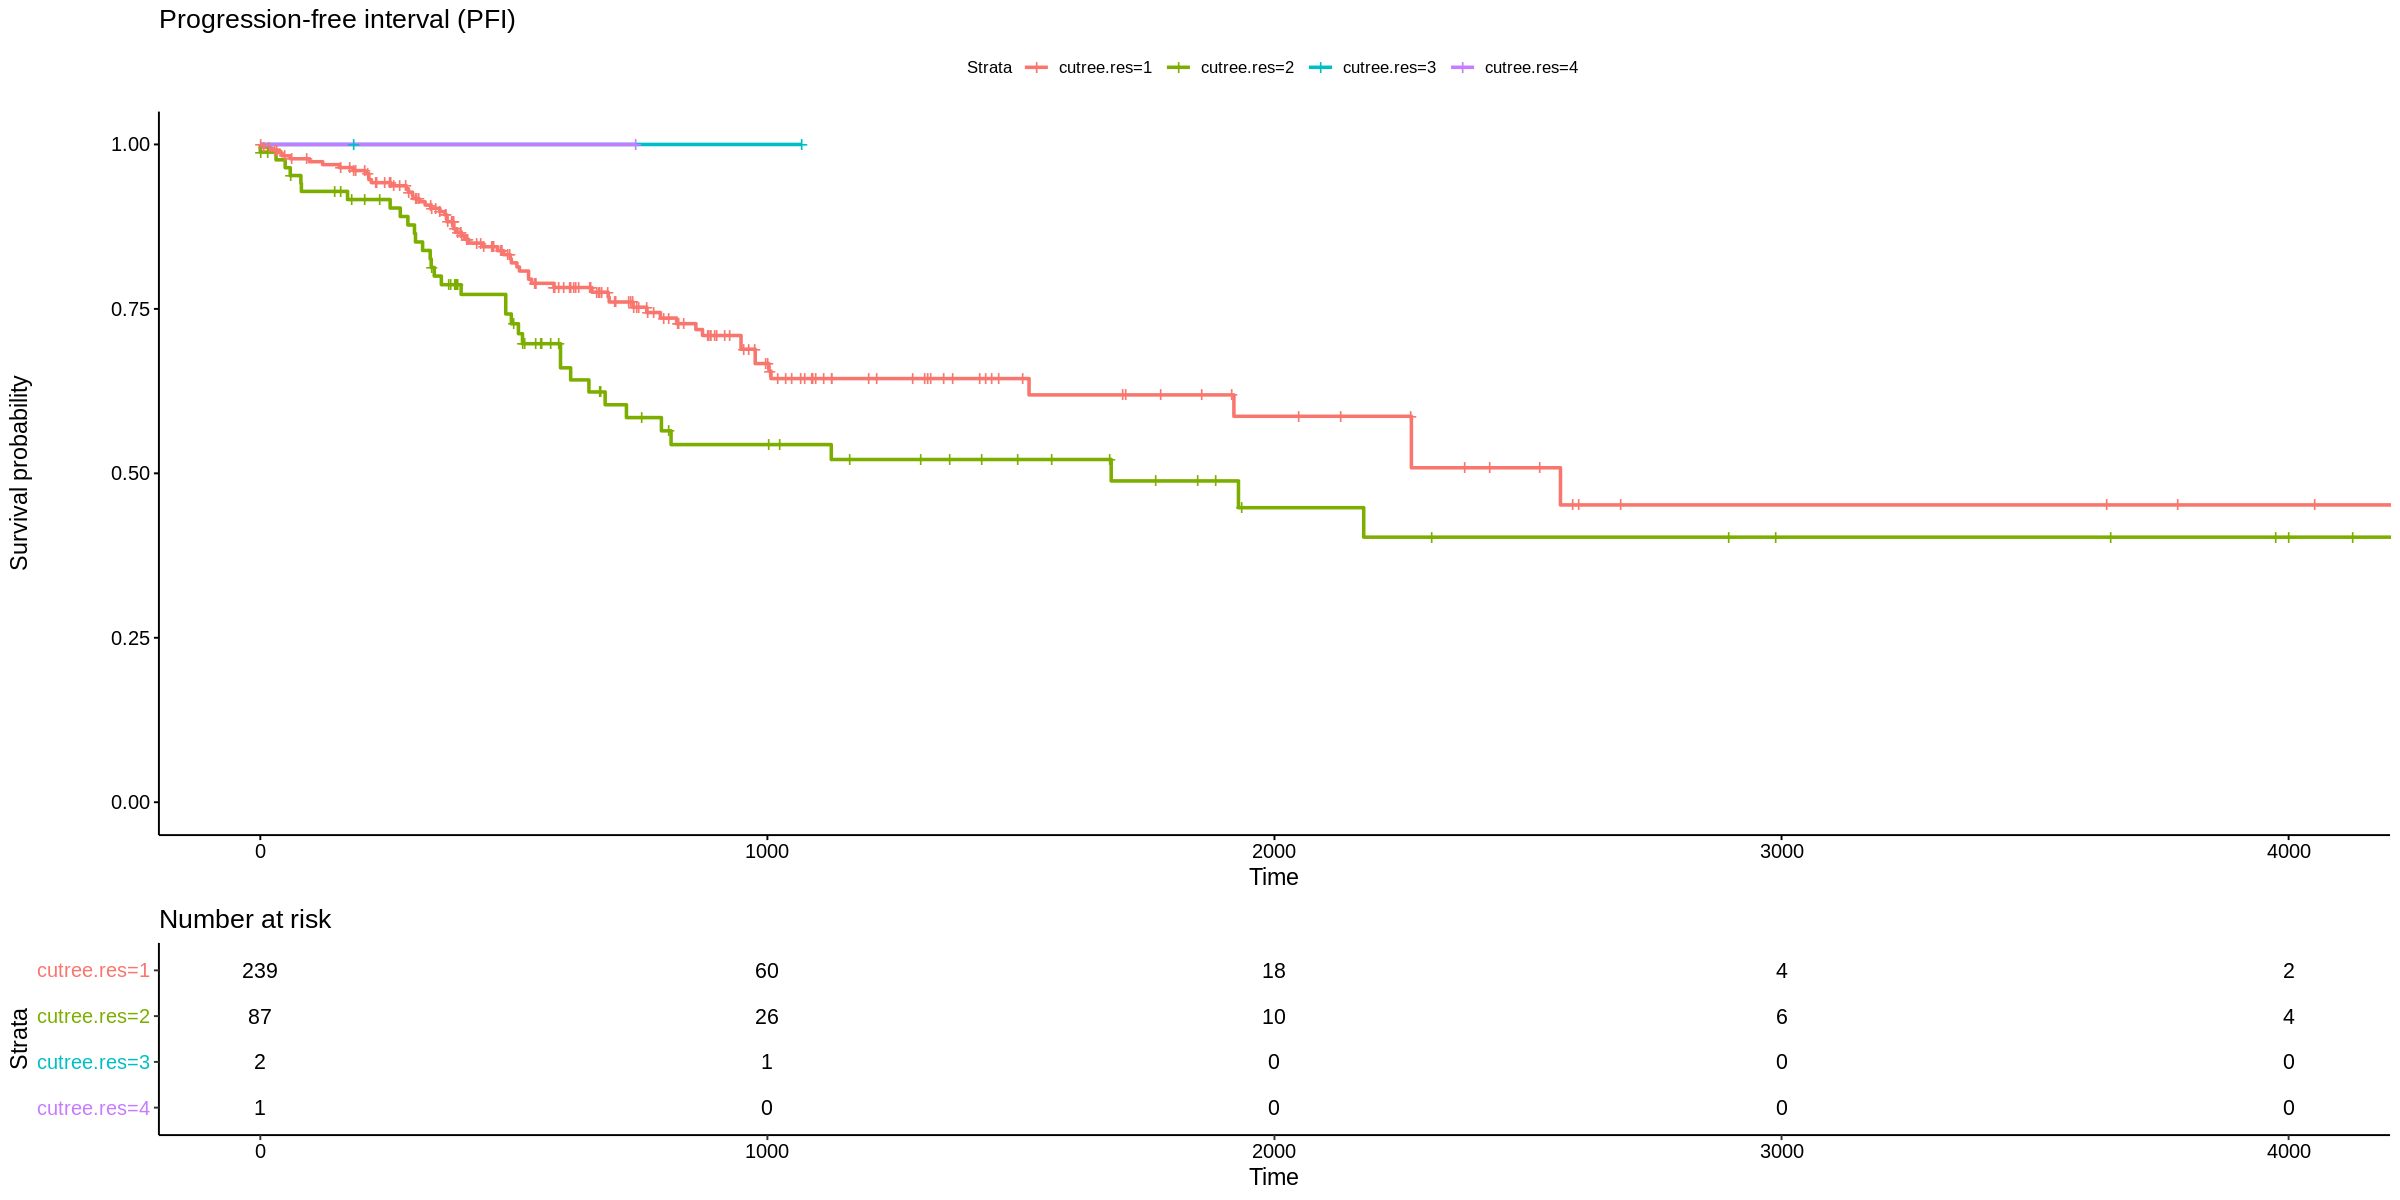

In [12]:
source("/data8t_4/JH/MyJobs/1_R_script/TCGA_plot/TCGAClusterSurv.R")
TCGAClusterSurv(Input.tb = Trans.Rang1.cv2500, hclust.res = hclust.Res, Col.anno = COAD.pheno, k = 4)

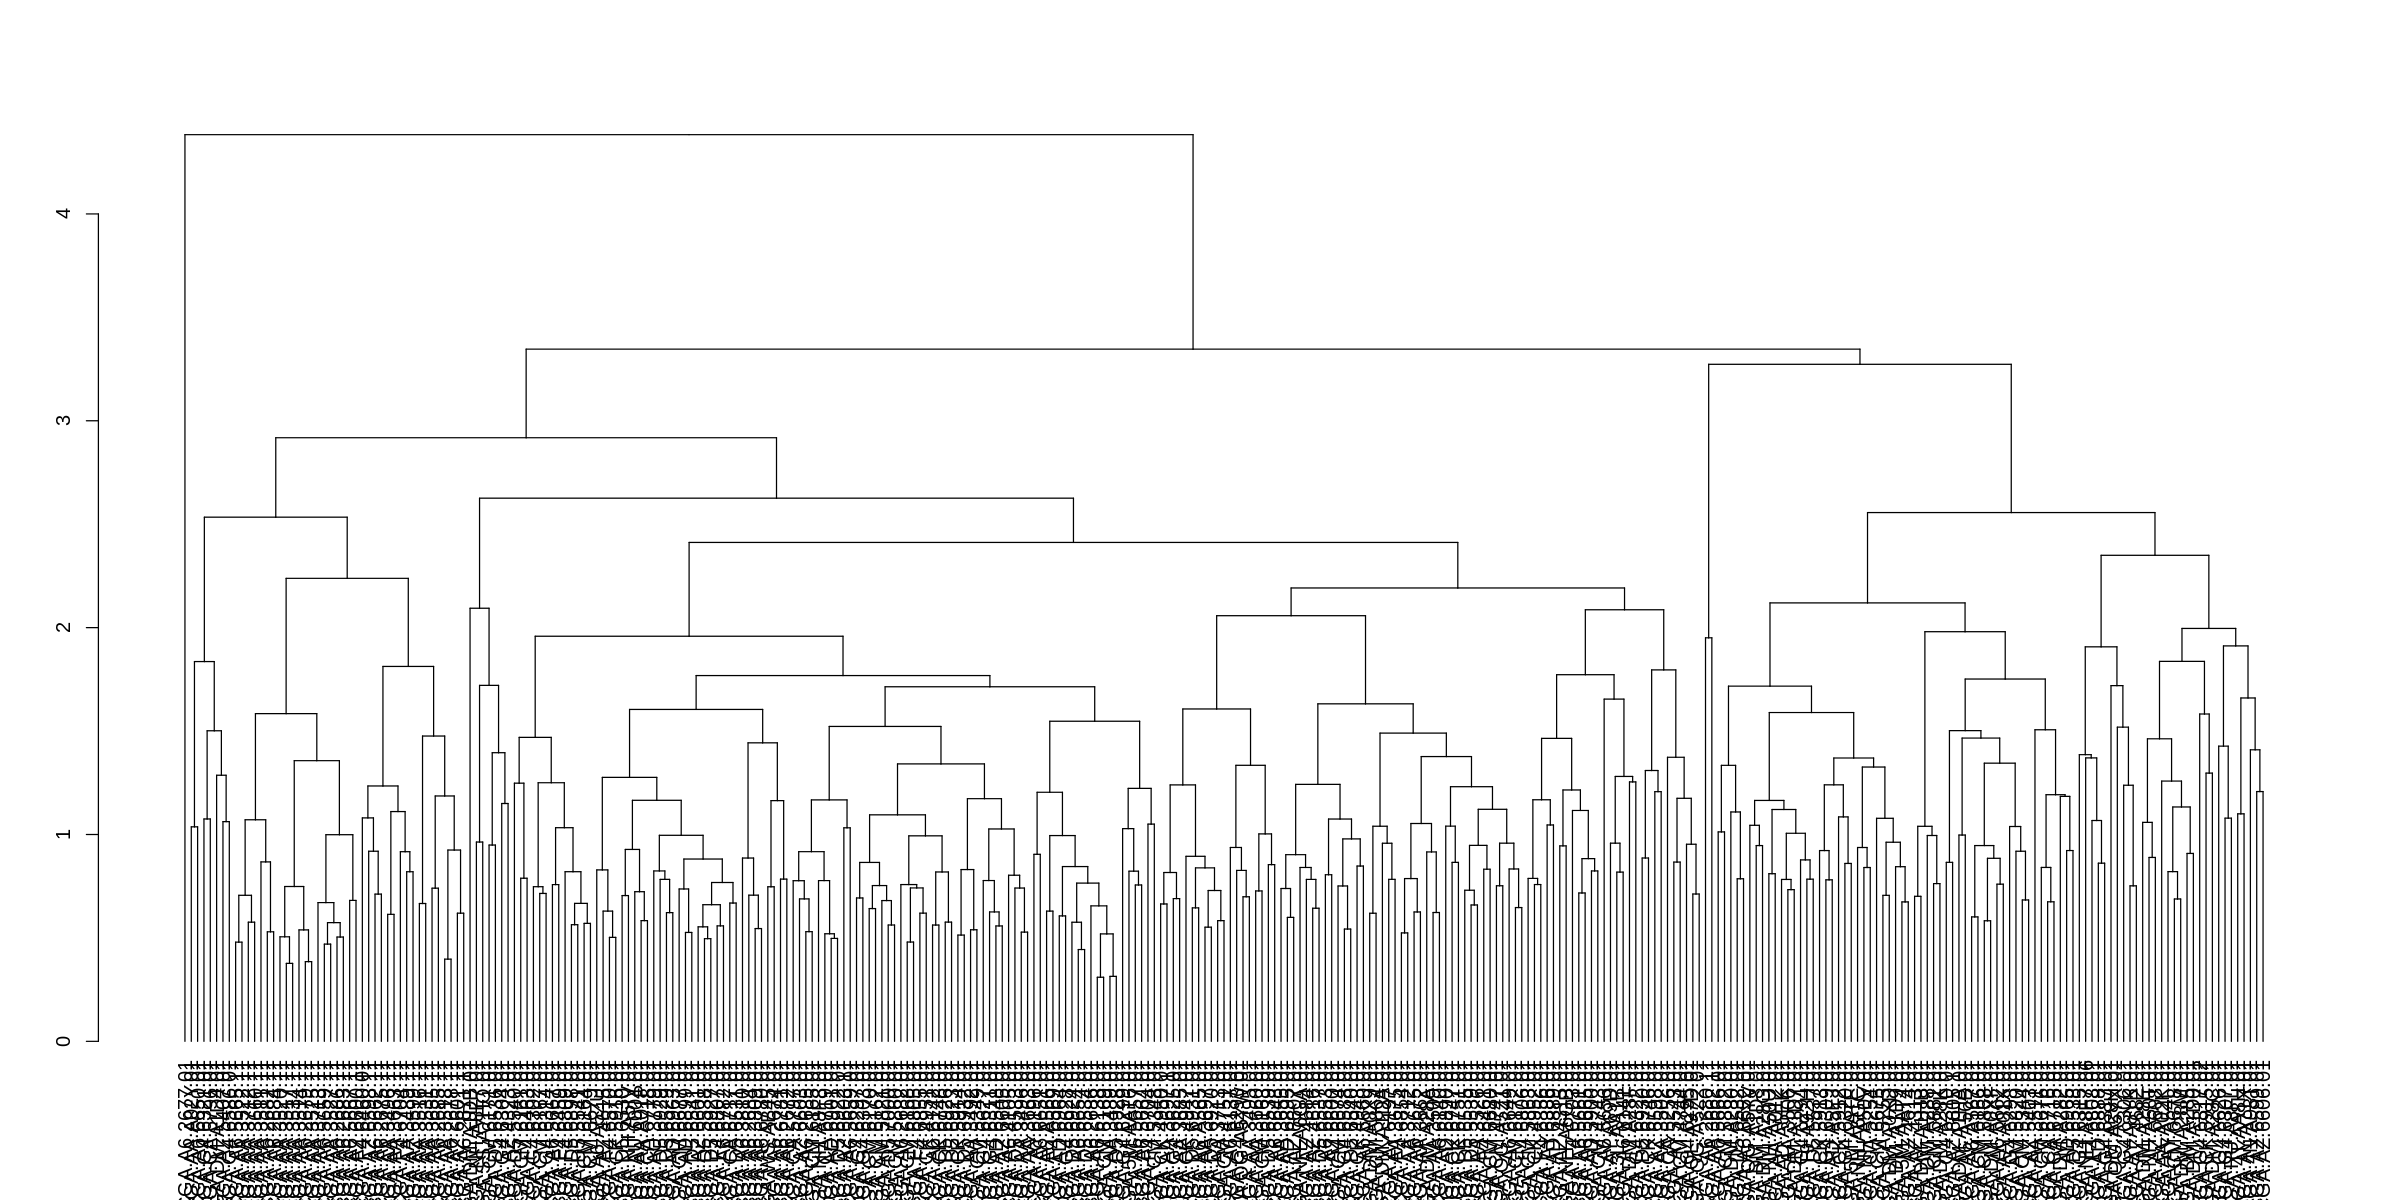

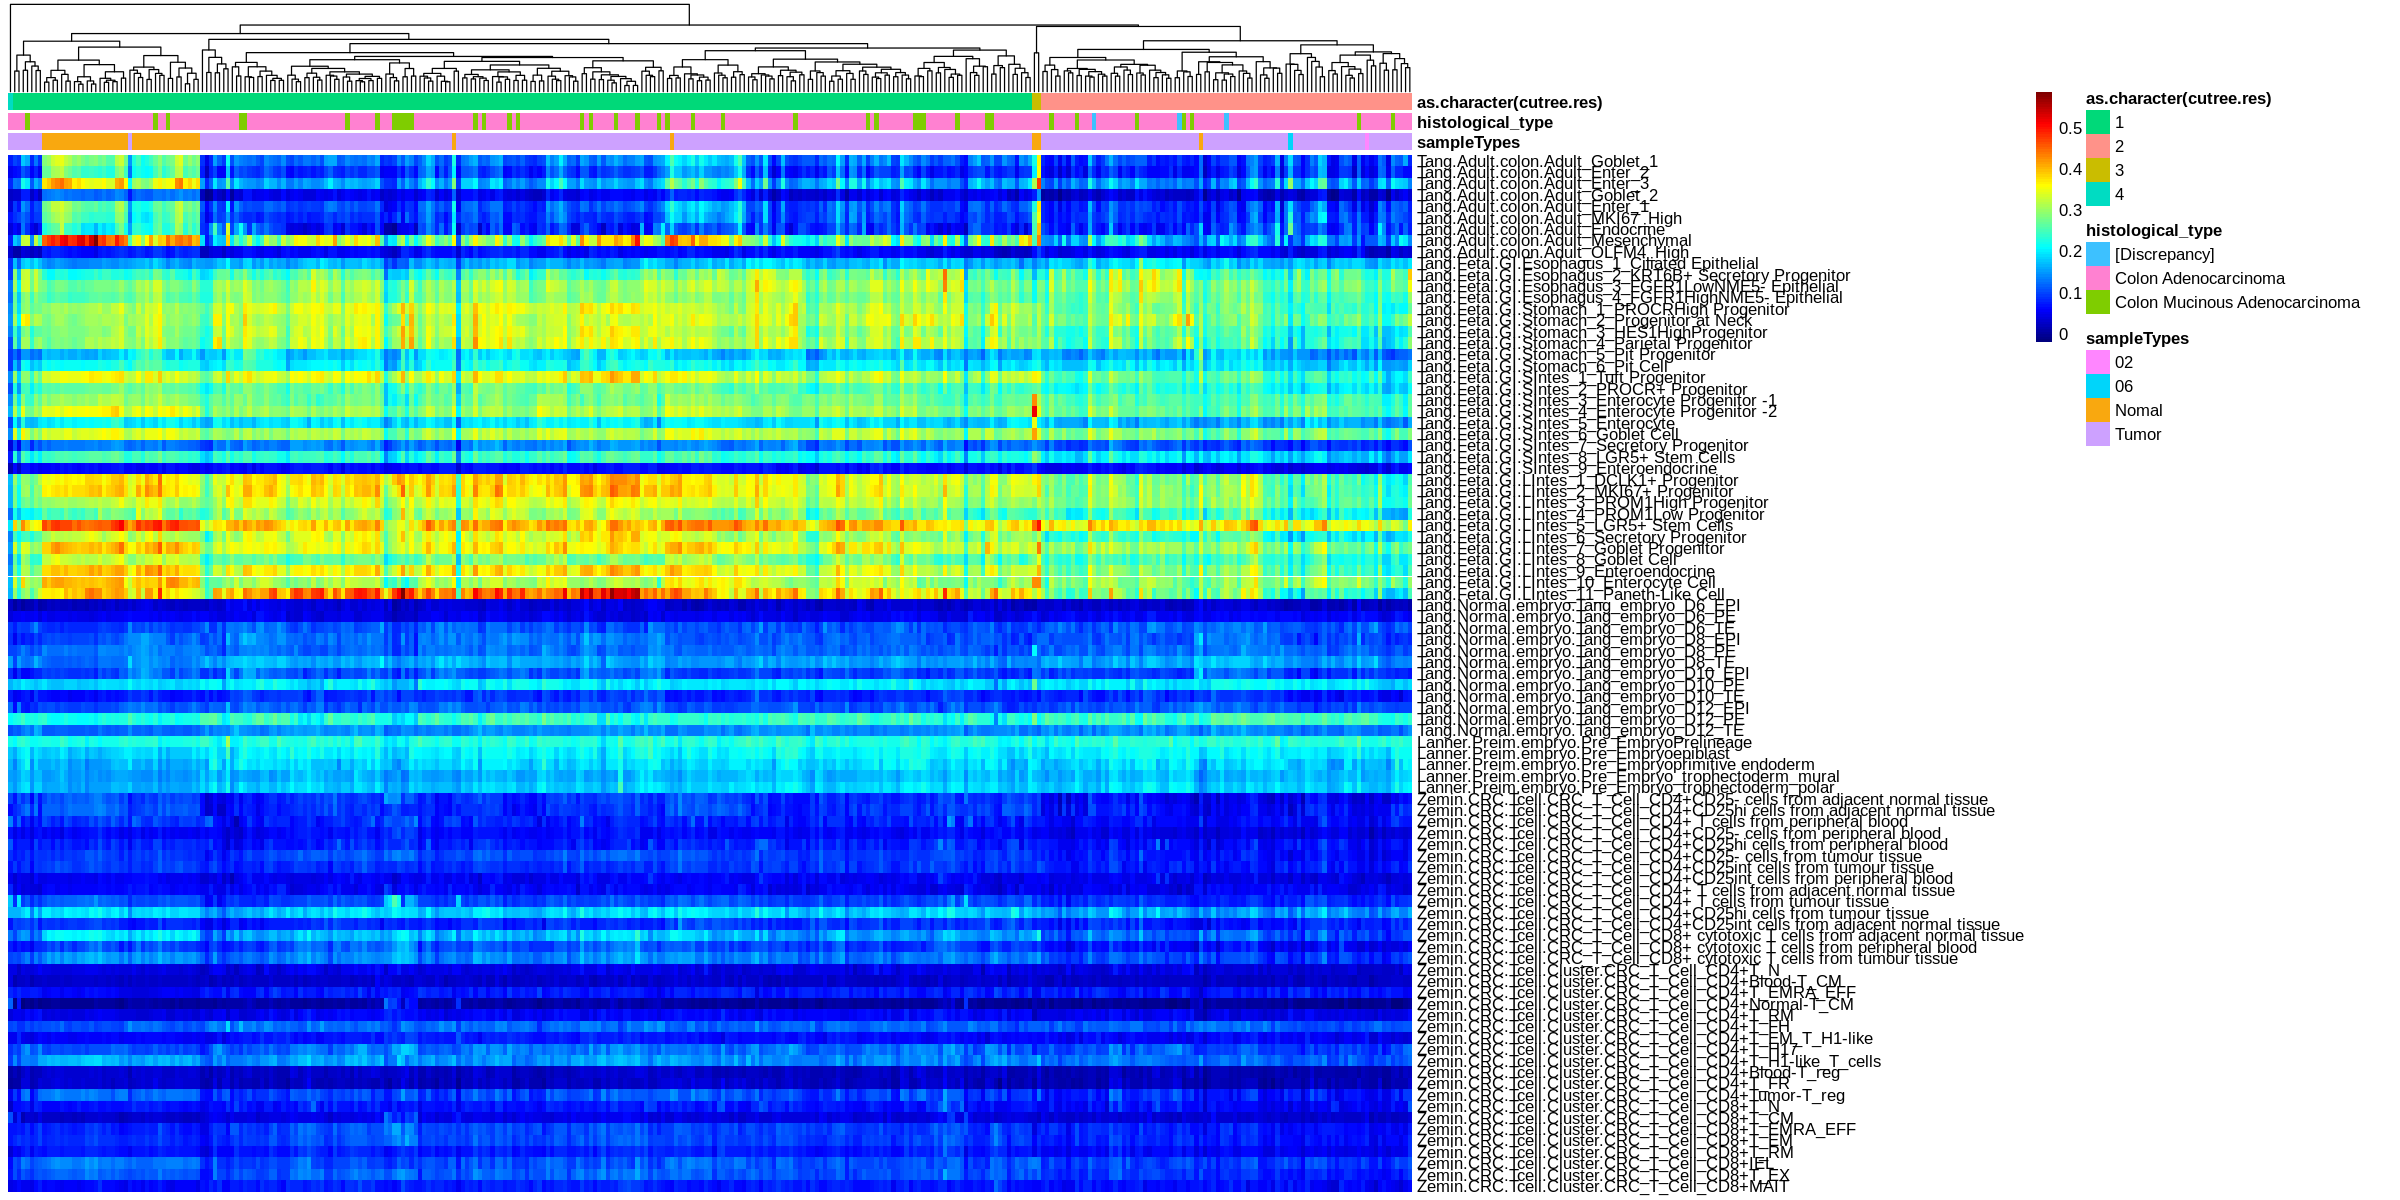

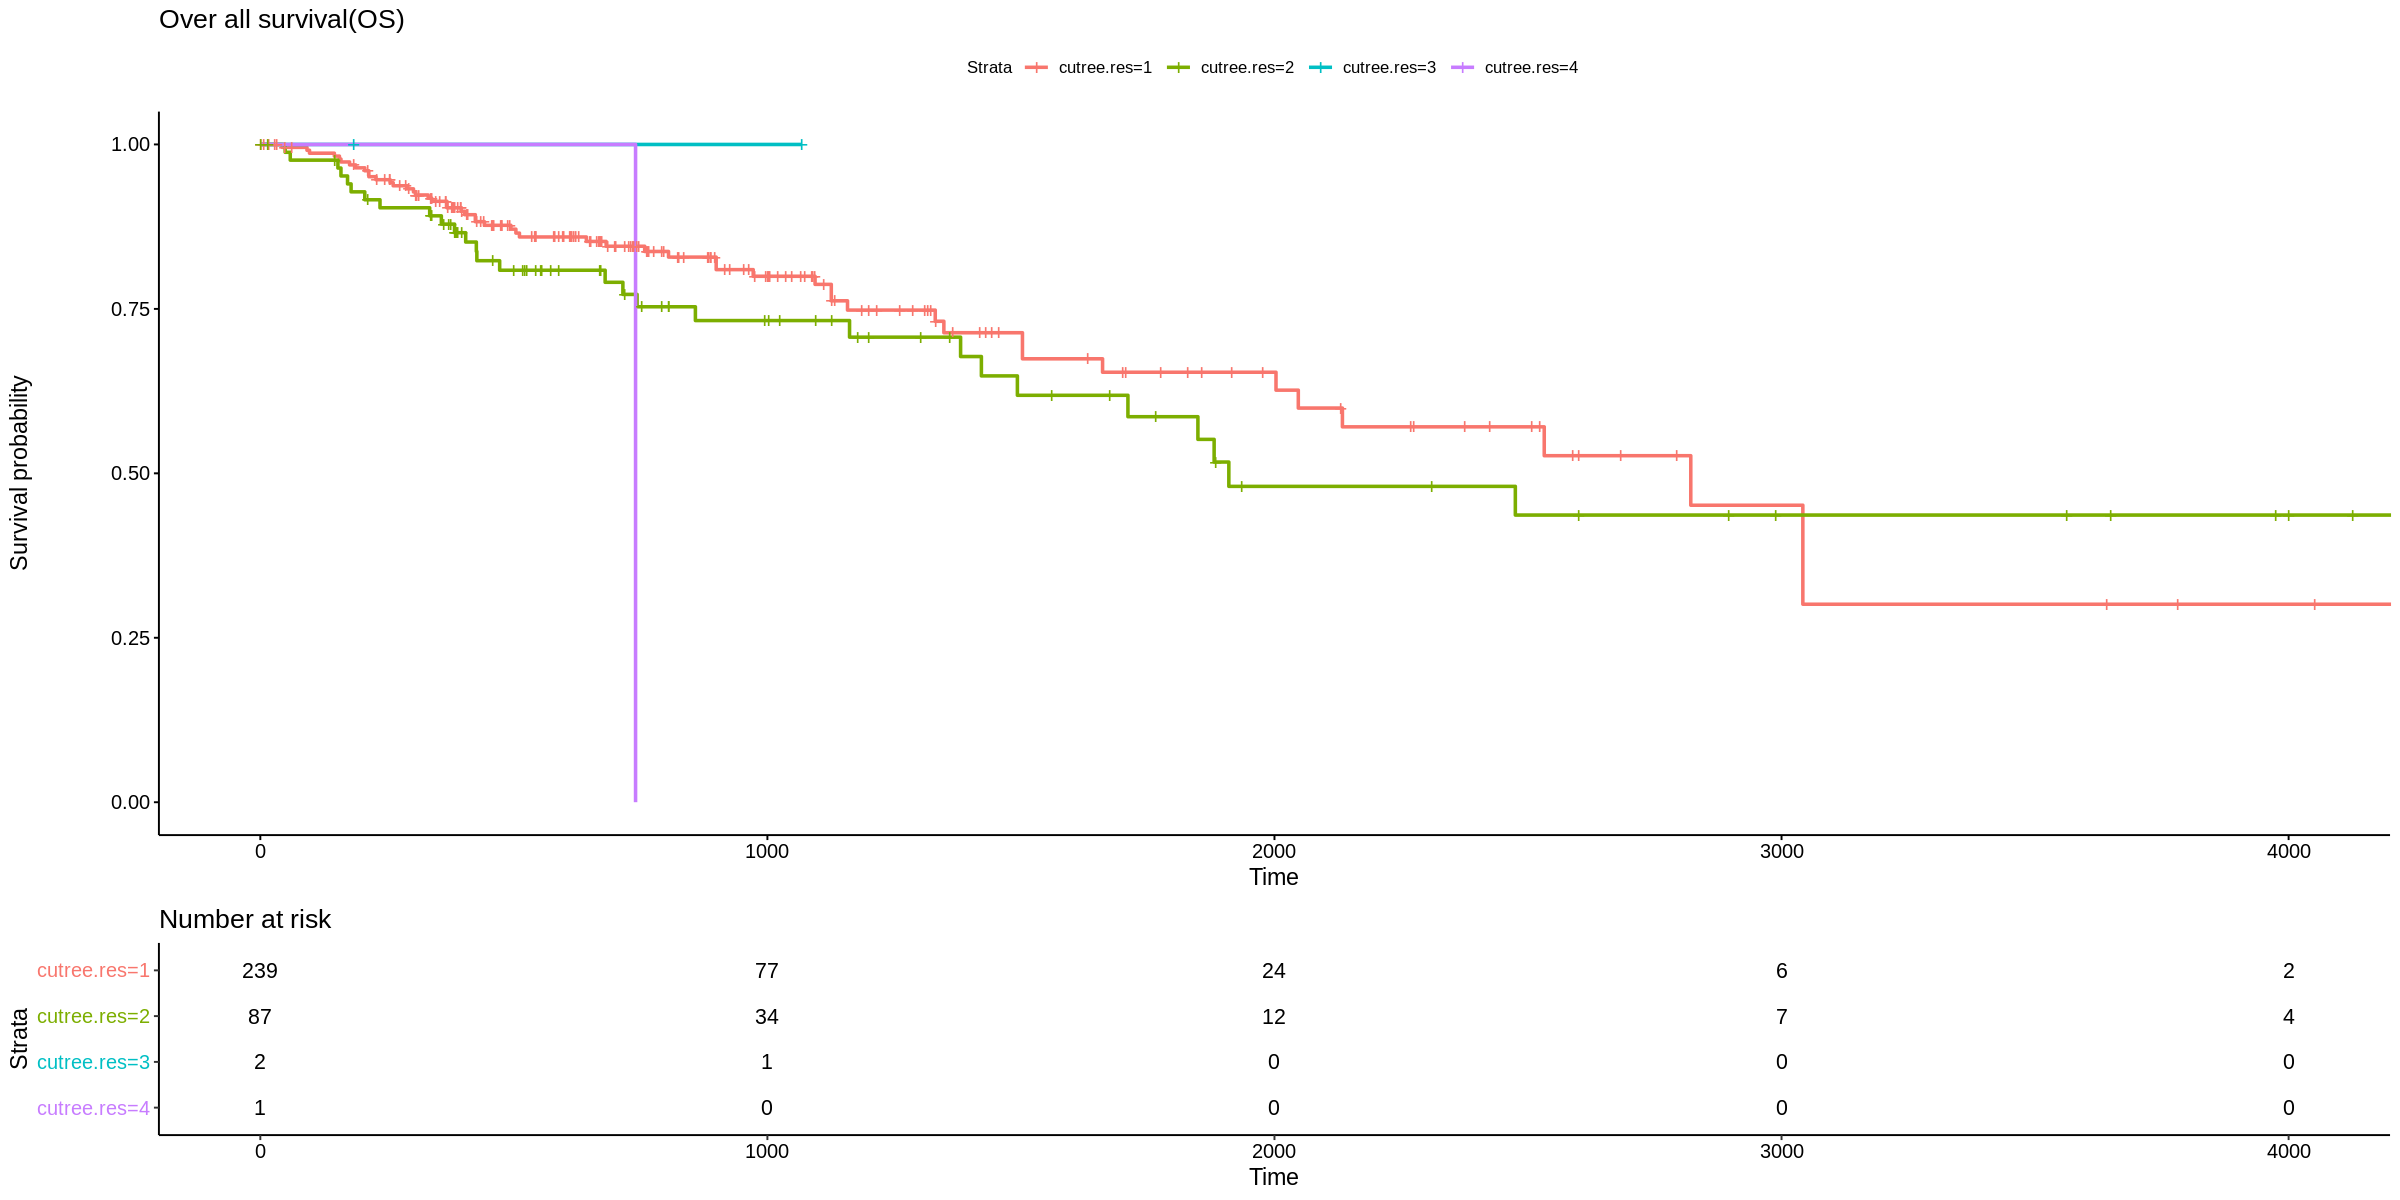

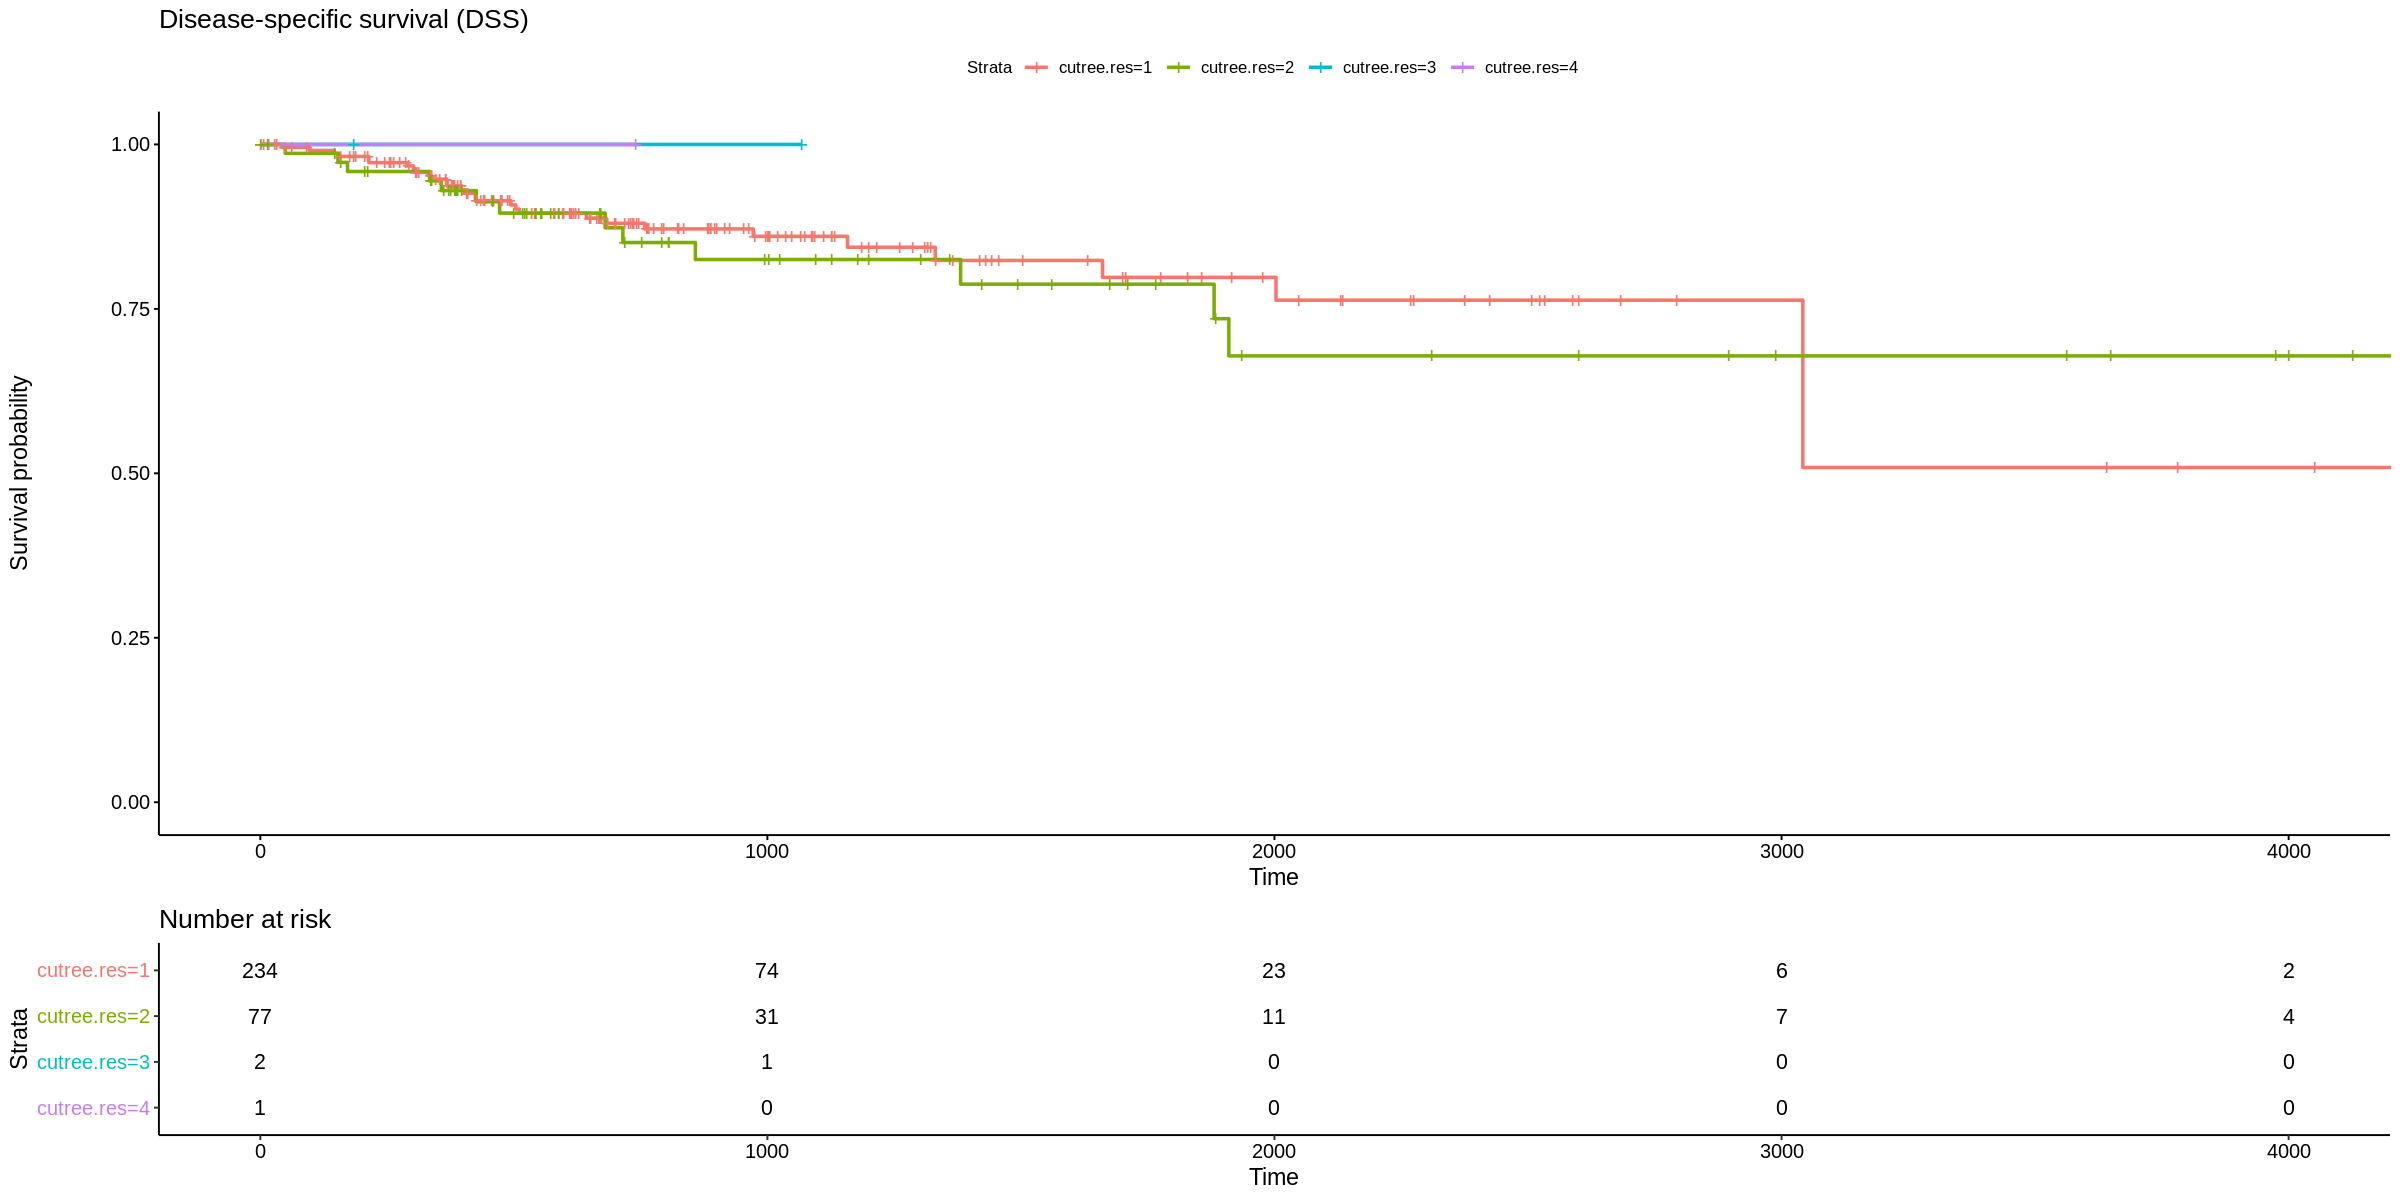

[[1]]

[[2]]

[[3]]

[[4]]

attr(,"class")
[1] "list"            "ggsurvplot_list"

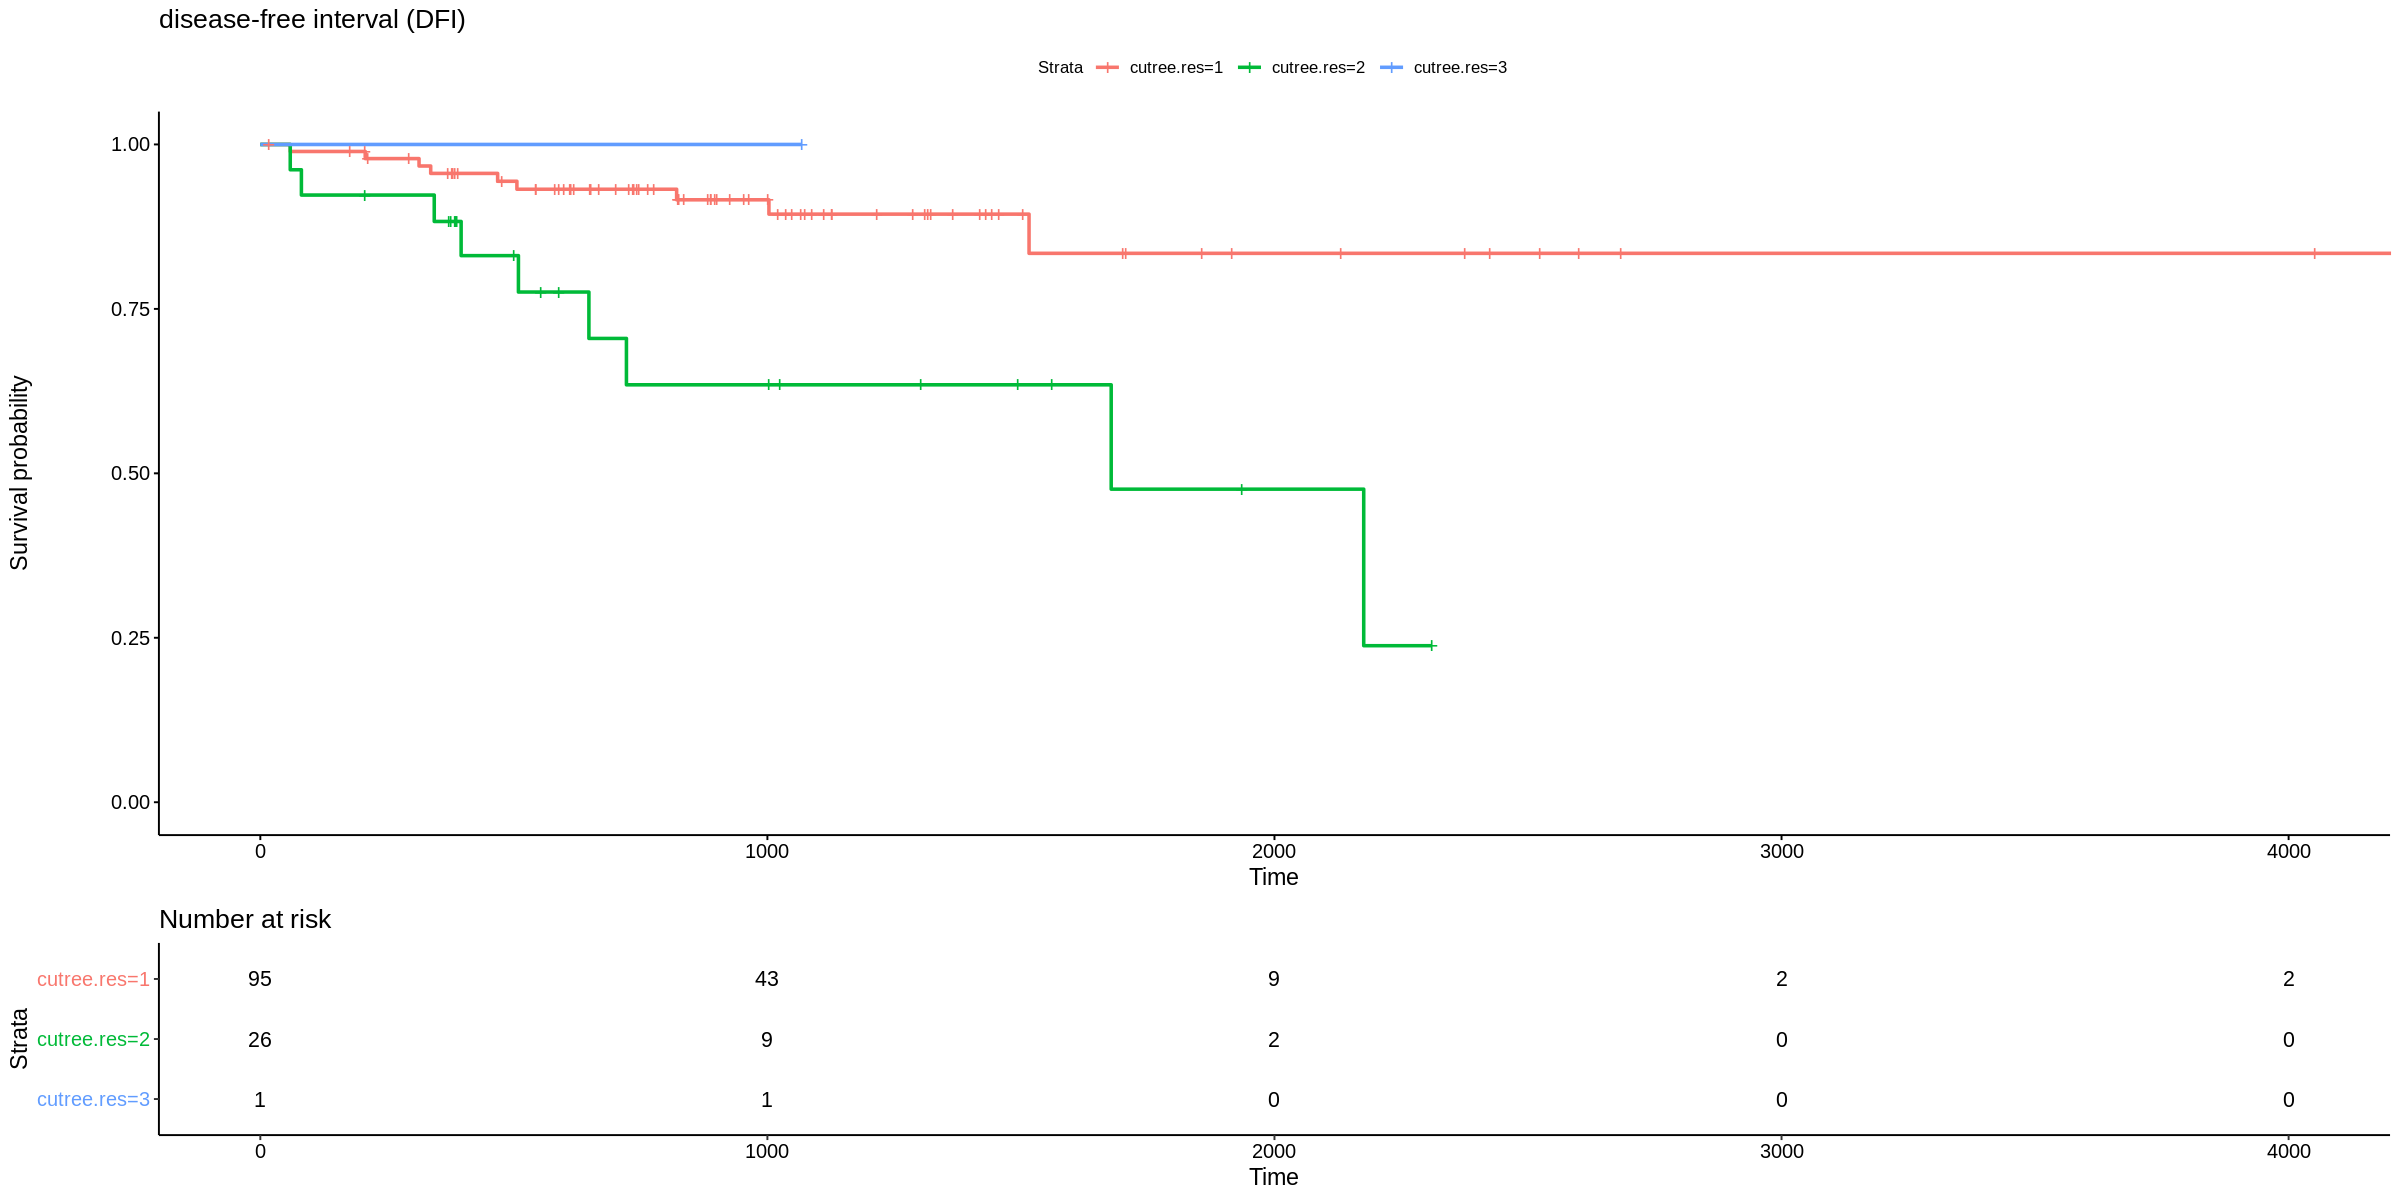

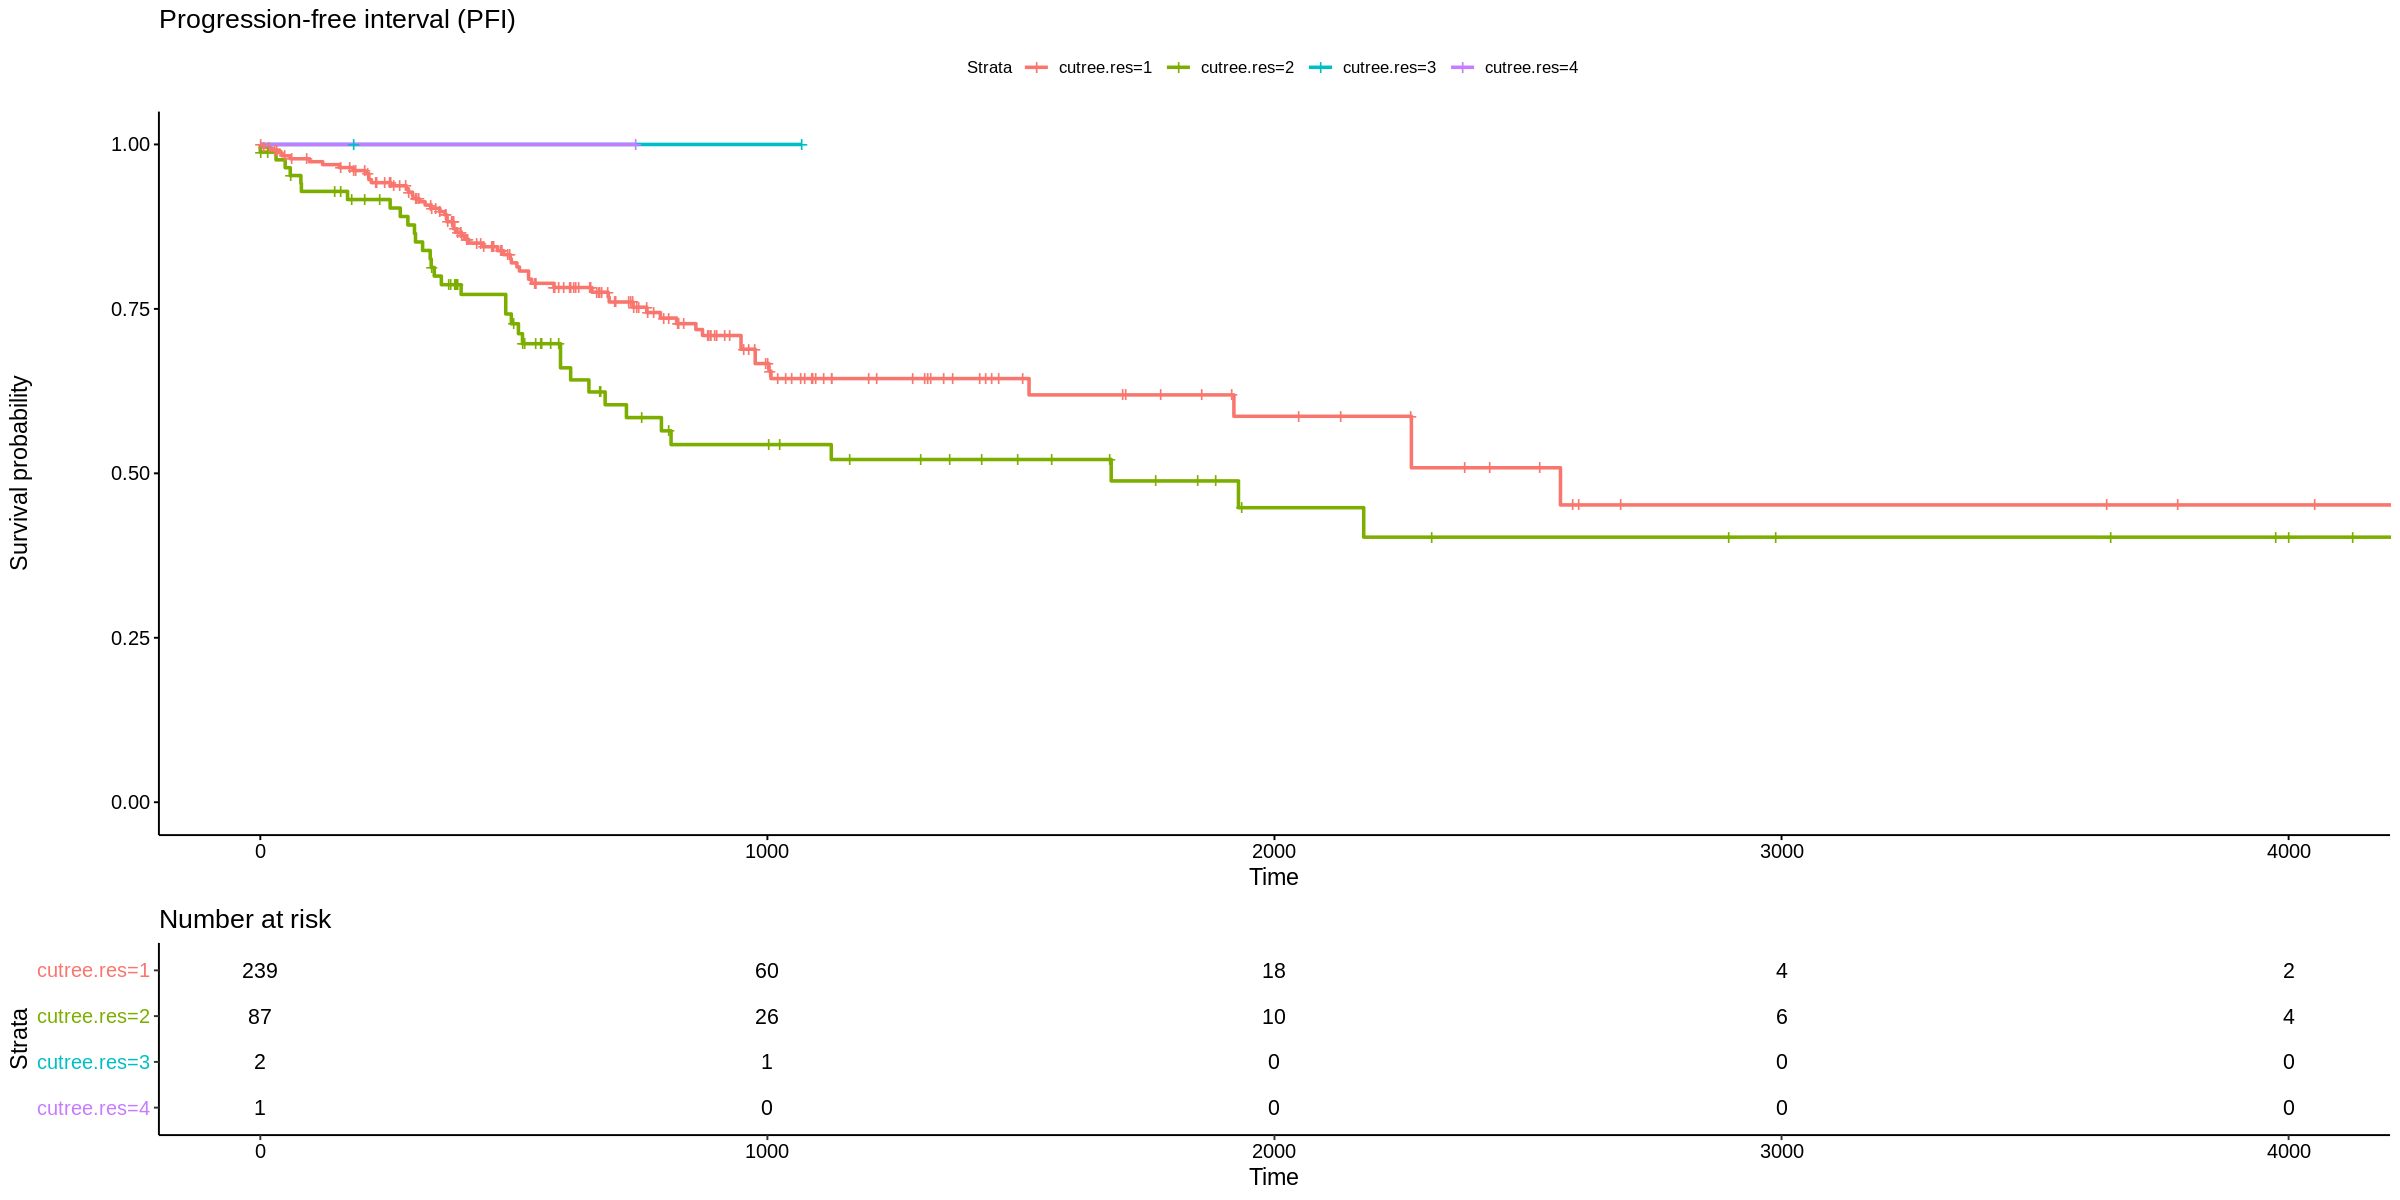

In [14]:
source("/data8t_4/JH/MyJobs/1_R_script/TCGA_plot/TCGAClusterSurv.R")
TCGAClusterSurv(Input.tb = Cor.Res.CV2500$Cor.merged, hclust.res = hclust.Res, Col.anno = COAD.pheno, k = 4)